# 0. Purpose of this work


The objective of this work is to provide a machine learning overview using Python language and a real database from Hospital Sírio-Libanês in Brazil.
The datase contains health monitoring data of patients in different windows of events and their eventual evolution to the intensive care unit (ICU).

Although it is desirable, it is not necessary to know programming to understand this work.

There is an attempt to explain all the methods and functions of the different libraries used. However, some may not be so clear to the reader who is unfamiliar with programming. It is encouraged that, in case of doubts, try to solve them by surfing the internet or even feel free to ask me directly.

# 1. Introduction



The covid-19 pandemic has plagued the world since the beginning of 2020, crowding hospitals and resulting in a scarcity of resources.

Thinking about this problem, in the first half of that year, a medical team at the Sírio-Libanês hospital made a database available on the [Kaggle](https://www.kaggle.com/dataset/b21ef02ed6bc7a4fbe097bce9aafe3c75879727377b0f475f7bddd0f95906252) platform about occupancy of intensive care unit (ICU) beds by by patients diagnosed with covid.

> Kaggle is an online community of data scientists and machine learning practitioners. Kaggle allows users to find and publish data sets, explore and build models in a web-based data-science environment, work with other data scientists and machine learning engineers, and enter competitions to solve data science challenges.

It is known that healthcare systems can be a scarce resource in pandemic times; therefore, being able to predict whether or not a patient will occupy a bed in ICU can be a strong ally in structuring plans to fight the disease considering the limited resources in terms of medical staff and hospital infrastructure.

The ultimate goal is to avoid collapse in the health care system, which is defined when there are cases above hospital capacity in terms of ICU beds, human resources and personal protective equipment.


![](images/cdc_200313_flatten_the_curve_800x450.jpg)

One possible solution to avoid this collapse can be obtained with machine learning application. 

Machine Learning is the field of study that gives computers the ability to learn without being explicitly programmed (Arthur Samuel, 1959).

The figure below (source: Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow, Aurélien Géron) explains, in a generic way, the application of Machine Learning to solve problems.

![](images/ML_def_fig_revA.jpg)

With machine learning it is possible to adjust algorithms to make predictions or decisions. There are many approuches and types of algorithms; if you wish to start to learn more about this subject I recommend this [article](https://machinelearningmastery.com/types-of-learning-in-machine-learning/).

For application in healthcare systems, it will be used supervised algorithms in order to predict, based in patient's initial medical conditions, if he/she will need an intensive therapy unit or not during the covid-19 treatment.

But before anything, we need to understand our database and its features.

# 2. Exploratory data analysis (EDA) part I: understanding and preparing the database

## 2.1 Loading and understanding the database

The first step is to load the database to this work; for this, we need to start coding. Let's go!

In [1]:
# for all the codes cells, like this one, when it starts with "#" means a comment, 
# so it will be ignored by the compiler (interpreter) that will process the commands

# the command "import" is used to bring a pre-installed Python library to this work
# in this case, it was loaded the pandas library, which is a very powerful library to
# work with massive data
import pandas as pd

# once the library is loaded, to start to work with it, is necessary to use its alias - in this case we choose "pd" for pandas
# this is where the database is currently stored - in this case, it is on my GitHub account
data = pd.read_excel("database/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")

Finally, we can open the database. 




In [2]:
# the head() method returns the first "n" rows. 
# try to change the number inside the brackets to modify the amount of rows that are displayed.

data.head(n=10)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
5,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
6,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,1
7,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,1
8,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.880952,-1.000000,-0.906832,-0.831132,-0.940967,-0.817204,-0.882574,-1.000000,6-12,1
9,1,1,90th,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.142857,-0.797980,0.315690,0.200359,-0.239515,0.645161,0.139709,-0.802317,ABOVE_12,1


According to the database creators (kaggle link at the Introduction section),the dataset contains anonymized data from Hospital Sírio-Libanês, São Paulo and Brasilia. All data were anonymized following the best international practices and recommendations. Data has been cleaned and scaled by column to fit between -1 and 1.

As can be seen, there are more than 230 columns ( at the bottom of the cell above, it is written "10 rows x 231 columns) each one being a feature such as GENDER, DISEASE GROUPING 1, TEMPERATURE_MEAN, OXYGEN_SATURATION_MIN, WINDOW and the last one, the "ICU".
Try to scroll to the right to see all these features; as there are too many columns in the database, not all of them are being shown.

The PATIENT_VISIT_IDENTIFIER column contains the patient's identifier.
There are 5 rows for each patient; each row refers to a time window, that can be seen in the WINDOW feature, starting from the moment of the hospital admission and up to "above 12 hours".

After a complete detailed analysis of the different columns, it is noted that the first 13 columns have categorical data and the rest, with the exception of the last two, are continuous features, which contain momentary information regarding the patient's health.

As for the last two columns, it has already been explained about WINDOW and with respect to ICU, it represents whether, for the time window in question, the patient is (ICU = 1) or not (ICU = 0) under intensive care unit.

So the first question that arises is: how many patients are there in this database? <br>
We can use the *shape* property to count the number of lines.

In [3]:
# the value 0 is to show only the amount of rows
# try to modify to 1 (the amount of columns) or even remove the brackets

data.shape[0]

1925

The database contains 1925 rows; there are data for 1925/5 = 385 patients.

Previously, when we loaded the database, we noticed that there were values with letters (strings) such as *60th* and *90th* and also *NaN* values (for example, check the values for ALBUMIN_MEDIAN above) which means "Not a Number", that is, they are null values.

The machine learning algorithms that we will use perform several numeric iterations, so we cannot have: 

a) any non-numeric value <br>
b) any null value



## 2.2 Dealing with non-numeric values

Let's start with **(a)**. The code below brings all the non-numeric columns of the database.

In [4]:
# select_dtypes method can extract, according to the parameters, the type of feature
# in this case, it was chosen to exclude from the result of the command all numeric features 
# which are "int", from "integer" and "float", which can be a representation of real numbers
data.select_dtypes(exclude=['int64', 'float64']).columns

Index(['AGE_PERCENTIL', 'WINDOW'], dtype='object')

Let's see a sample of these two columns:

In [5]:
# NumPy is a library for the Python programming language, adding support for large, 
# multi-dimensional arrays and matrices, along with a large collection of high-level 
# mathematical functions to operate on these arrays
import numpy as np

# NumPy random seed is simply a function that sets the random seed of the NumPy 
# pseudo-random number generator. It provides an essential input that enables 
# NumPy to generate pseudo-random numbers for random processes;
# with this, repeatability is obtained
np.random.seed(1764845)

# sample method provide a random sample from the database
# as we have set the seed above, the result will always be the same
# if you try with different seeds values, you will obtain different sample configurations 
# n: amount of rows of the sample
data[["AGE_PERCENTIL", "WINDOW"]].sample(n=5)

,AGE_PERCENTIL,WINDOW
536,Above 90th,2-4
74,60th,ABOVE_12
1514,50th,ABOVE_12
751,Above 90th,2-4
1682,10th,4-6


There are letters with numbers in the AGE_PERCENTIL column and the WINDOW column brings the range hours that the health data belong to; this one will be discussed later.

The first one, AGE_PERCENTIL, can be an important factor in the evolution of health status with covid-19; so we cannot disregard this data. We will treat this categorical data and replace it with numbers.

In [6]:
# Scikit-learn (aka sklearn) is a free software machine learning library for the Python programming language
# https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

# the preprocessing package provides several common utility functions including LabelEnconder()
# that is capable to encode target labels with values between 0 and n_classes-1

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

# fit() method "teaches" the preprocessing tool what are the values that need to be converted - in this case,
# the values of "AGE_PERCENTIL" column
le.fit(data.AGE_PERCENTIL)

# classes_ attribute shows the label for each identified class
le.classes_

array(['10th', '20th', '30th', '40th', '50th', '60th', '70th', '80th',
       '90th', 'Above 90th'], dtype=object)

In [7]:
# the code below is necessary to update the "AGE_PERCENTIL" feature
# according to the classes identified, i.e., to transform labels to 
# a normalized encoding
data["AGE_PERCENTIL"] = le.transform(data.AGE_PERCENTIL)

Let's see the same sample that was shown before, but this time with the updated AGE_PERCENTIL feature:

In [8]:
# it is necessary to use the same seed than before to obtain the same sample
np.random.seed(1764845)
data[["AGE_PERCENTIL", "WINDOW"]].sample(n=5)

,AGE_PERCENTIL,WINDOW
536,9,2-4
74,5,ABOVE_12
1514,4,ABOVE_12
751,9,2-4
1682,0,4-6


We can clearly see that the algorithm transformed "Above 90th" in class 9, "60th" in class 5, "50th" in class 4 and "10th" in class 0; that way the machine learning algorithm can understand this information.

## 2.3 Dealing with null values and identifying repeated columns

Now it is time for **(b)**. To understand how many null values there are in each of the features, we can use the info () method.

In [9]:
# the parameter "show_counts" is responsible to bring the amount of non-null values
# the max_cols is to force the method to bring the information for all the features

data.info(show_counts=True,max_cols=231)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 231 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    PATIENT_VISIT_IDENTIFIER          1925 non-null   int64  
 1    AGE_ABOVE65                       1925 non-null   int64  
 2    AGE_PERCENTIL                     1925 non-null   int32  
 3    GENDER                            1925 non-null   int64  
 4    DISEASE GROUPING 1                1920 non-null   float64
 5    DISEASE GROUPING 2                1920 non-null   float64
 6    DISEASE GROUPING 3                1920 non-null   float64
 7    DISEASE GROUPING 4                1920 non-null   float64
 8    DISEASE GROUPING 5                1920 non-null   float64
 9    DISEASE GROUPING 6                1920 non-null   float64
 10   HTN                               1920 non-null   float64
 11   IMMUNOCOMPROMISED                 1920 non-null   floa

Note that only the first 4 columns (PATIENT_VISIT_IDENTIFIER, AGE_ABOVE65, AGE_PERCENTIL, GENDER) and the last 2 (WINDOW and ICU) have all the 1925 non-null columns, that is, with filled values .

Also, note that columns 4-12 contains just 5 rows with null lines; this set of data is very likely to be for 1 single patient. We will back to these 5 missing rows in detail later on.

Nevertheless, all the other columns have several null rows. Notice that most of the columns do not have even half of the patient data filled in, always presenting exactly 821 lines with some filled value. These columns refer to momentary patient's health data of a specific time window; when we check the name of these features, the biological / chemical property is repeated, but the parameter is varied (MEDIAN, MEAN, MIN, MAX, DIFF); given the number of rows in these columns with precisely the same number of null fields, the question is raised: are there columns in the database that provide absolutely identical information for all the different patients? Or, to put in other words, are there equal columns?

To answer this, we can build the first function of this work. If you wish to learn more about Python functions, you can visit this [link](https://www.w3schools.com/python/python_functions.asp).




In [10]:
# This function receives a dataframe and return the list of duplicate columns

def getDuplicateColumns(df): 
    # define an empty list to add eventual duplicate columns
    duplicate_columns = []
      
    # iterate through all the columns   
    for x in range(df.shape[1]): 
          
        # take column at xth index. 
        column = df.iloc[:, x] 
          
        # iterate through all the columns in from (x + 1)th index to last index 
        for y in range(x + 1, df.shape[1]): 
              
            # take column at "yth" index. 
            other_column = df.iloc[:, y] 
              
            # check if two columns at x & y index are equal or not 
            # if equal then add to the list
            if column.equals(other_column): 
                duplicate_columns.append(df.columns.values[y])
                  
    # return list of unique column names whose contents are duplicates. 
    unique_duplicate_columns = list(dict.fromkeys(duplicate_columns))
    
    return unique_duplicate_columns

Once the function is set, we can use it:

In [11]:
# calling the freshly created function
duplicate_columns = getDuplicateColumns(data)

# as there were identified many duplicate columns, let's print just the first ten features
print("Sample of 10 duplicate columns:")
print(duplicate_columns[:10])

# the letter "f" is to interpolate the string with a varible (between {}); this way it is really fast to print variables with text
print(f"\nTotal number of duplicate columns: {len(duplicate_columns)}")

Sample of 10 duplicate columns:
['ALBUMIN_MEAN', 'ALBUMIN_MIN', 'ALBUMIN_MAX', 'BE_ARTERIAL_DIFF', 'BE_VENOUS_DIFF', 'BIC_ARTERIAL_DIFF', 'BIC_VENOUS_DIFF', 'BILLIRUBIN_DIFF', 'BLAST_DIFF', 'CALCIUM_DIFF']

Total number of duplicate columns: 143


As we can see, there are 143 columns that show the same information of another columns. At this moment, we will continue using the whole database, knowing that we have duplicated information and later we will return to this topic.

Still on the analysis of columns with null values, it is important to mention that the lack of values filled in databases in the world of data science is quite common. There are several strategies for dealing with this situation.

One of these strategies is simply to get rid of any row with null values; however, this database does not seem to be large enough for us to proceed in this way without affecting the representativeness of the data, which can compromise the machine learning algorithm. So we will not do that for the first analysis.

Another approach, even recommended by the database authors, who are physicians, is to consider that the patient's conditions do not vary significantly from one time window to another. In this sense, we can replicate, for each individual patient, the data from their previous windows. 

For this we can create another function, which first groups the data by patient and then perform a forward fill (ffill) following by a back fill (bfill) only for those columns that refer to the momentary patient's health data of a specific time window. Remember that columns 4-12 also present null values but as they present categorical data, these we will discuss later.

In [12]:
def fillTable(data):
    # extract the columns information of those columns that represent the 
    # momentary patient's health data
    momentary_health_data_columns = data.iloc[:,13:-2].columns

    # apply forward fill followed by back fill for just these columns
    momentary_health_data_filled = data.groupby("PATIENT_VISIT_IDENTIFIER", 
                                         as_index=False)[momentary_health_data_columns].\
                                         fillna(method="ffill").fillna(method="bfill")

    # in order to return a new database, it is necessary to rebuild it
    # first it is necessary to extract the same categorical data from the
    # original data
    categorical_data_original = data.iloc[:,:13]

    # then it is necessary to extract the Window and ICU data (last 2 colums)
    window_ICU_data_original = data.iloc[:,-2:]

    # with the 3 sets of data, it is possible to rebuild the same database 
    # structure, this time with the filled momentary health data columns 
    filled_data = pd.concat([categorical_data_original,
                             momentary_health_data_filled, 
                             window_ICU_data_original], 
                            ignore_index=True, axis=1)
    
    # rename the columns to its original names
    filled_data.columns = data.columns
    
    return filled_data

As can be seen in the cell below, the columns that used to appear as *NaN* are now filled with their neighboring values.

In [13]:
filled_data = fillTable(data)
filled_data.head(10)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
3,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0
4,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
5,1,1,8,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
6,1,1,8,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,1
7,1,1,8,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,1
8,1,1,8,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.880952,-1.000000,-0.906832,-0.831132,-0.940967,-0.817204,-0.882574,-1.000000,6-12,1
9,1,1,8,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.142857,-0.797980,0.315690,0.200359,-0.239515,0.645161,0.139709,-0.802317,ABOVE_12,1


Now it is time to remember that, in addition to the columns that represent the patient's health conditions, there were categorical columns that also contained 5 rows with null data. These columns were not included in the function, so it is not expected to have been filled; to confirm the continued existence of these columns, we can use the command below.

In [14]:
# list all columns that contains any null data
filled_data.columns[filled_data.isna().any()].tolist()

['DISEASE GROUPING 1',
 'DISEASE GROUPING 2',
 'DISEASE GROUPING 3',
 'DISEASE GROUPING 4',
 'DISEASE GROUPING 5',
 'DISEASE GROUPING 6',
 'HTN',
 'IMMUNOCOMPROMISED',
 'OTHER']

As was seen earlier, because there were only 5 rows missing for these columns, we can simply get rid of them. For this purpose, we can use the following command:

In [15]:
# remove all rows with null data
new_filled_data = filled_data.dropna()

Finally, to confirm that the 5 missing rows in these categorical data were from a single patient (to avoid any possible impacts in the upcoming machine learning algorithms), we can count the number of patients that we now have in the database.

In [16]:
print("Number of patients of 'new_filled_data' variable:")
len(new_filled_data.groupby("PATIENT_VISIT_IDENTIFIER").count().index)

Number of patients of 'new_filled_data' variable:


384

As we now have 384 patients (before there were 385) we confirmed that the 5 rows of missing categorical data were from the same patient which has now been dropped from our study.


With the dataset with no more null values, we should recall that the objective of this study is to predict, based on health data, whether a particular patient will need an ICU or not; hence, in this study, we cannot have patients who arrive at the hospital and are immediately forwarded directly to the ICU because all their health data - for all the time windows - of this (these) patients are already referring to that type of treatment.

The same reasoning will be used when we are going to train our machine learning algorithms; we cannot use data from patients who are already in the ICU.

This premise is so important that even an alert - in the form of a figure - was made by the creators of the dataset:

![](images/ICU_use_data.jpg)

To perform this crucial final database cleaning, there is the following code:

In [17]:
# this array ('patient_to_remove') store all the patients whose first window (0-2 hours) 
# is already 1 for ICU.
patient_to_remove = new_filled_data.query("WINDOW =='0-2' and ICU == 1")["PATIENT_VISIT_IDENTIFIER"].values

# creates a new dataframe without the 'patient_to_remove'
# the @ character here marks a variable name rather than a column name
machine_learning_data = new_filled_data.query("PATIENT_VISIT_IDENTIFIER not in @patient_to_remove")


In [18]:
print("Number of patients of 'machine_learning_data' DataFrame:")
len(machine_learning_data.groupby("PATIENT_VISIT_IDENTIFIER").count().index)

Number of patients of 'machine_learning_data' DataFrame:


352

With the data of 352 patients we have the first version of the database ready to be used in machine learning algorithms that aim to fulfill our objective. But first let's deepen our exploratory data analysis using this newest database.



# 3. Exploratory data analysis (EDA) part II: analysis of proportions and studies of the features most correlated with the presence or absence of a patient in the ICU

## 3.1 Analysis of proportions

During this session we will plot some graphics; to avoid duplicate scripts, we should define a function dedicate to this purpose.

In [19]:
# seaborn is a graphical library
import seaborn as sns
import matplotlib.pyplot as plt

def plotGraph(data, title, x, type, y_limit = None, y=None, labels = None):
    # theme of the graphic, definition of style and font
    sns.set_theme(style = "darkgrid", font='serif', font_scale = 1.4)

    # type of the graphic and its parameters
    if type == "bar":
        ax = sns.countplot(data = data,x=x)
  
    if type == "box":
        ax = sns.boxplot(data =data, x = x, y=y)

    # size of the graphic depending of its type
    if type == "bar":
        ax.figure.set_size_inches(7,7)
  
    if type == "box":
        ax.figure.set_size_inches(5,5)

    # title (the \n is to creat an extra gap between the title and the figure)
    ax.set_title(title + "\n")

    # disable y label ("count")
    ax.set(ylabel=None)

    # x label settings (x_tick labels, disable x label and set the limit)
    ax.set_xticklabels(["No ICU (0)", "ICU (1)"])
    ax.set(xlabel=None)
  
    if y_limit != None:
        ax.set_ylim(top=y_limit)

    # to add the labels over the bars
    if labels == True:
        for rect in ax.patches:
        # find the values of each bar
            height = rect.get_height()
            width = rect.get_width()
            x = rect.get_x()
            y = rect.get_y()
    
            # label text is exactly its height
            label_text = f'{height}'

            # parameters x and y of the label (the 0.02*y_limit in label_y is to adjust better in the fig.)
            label_x = x + width / 2
            label_y = height + (0.02*y_limit)

            # plot the label if height is different than zero
            if height != 0:
                ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=15)

    plt.show(ax)

Now it is possible to plot using a single row of code, just by calling the function.

To understand how many time windows of the different patients are related to ICU treatments, we can plot the graph below

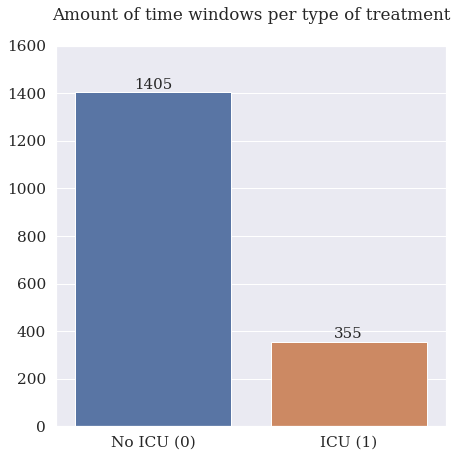

In [20]:
# "title" is one of the parameters that are necessary of the plotGraph function
title = "Amount of time windows per type of treatment"

plotGraph(data = machine_learning_data, type = "bar", title = title, x="ICU", y_limit = 1600, labels=True)

However this graphic doesn't take into account the number of patients who present at least one time window under ICU treatment. To obtain this, we can use the following code:

In [21]:
# the groupby() method is applied to the patient identification followed by the aggregate function that returns the maximum value for "ICU" feature 
# which in turn is followed by value_counts() method which counts the quantity for the 2 possible "ICU" values: 0 and 1.
machine_learning_data.groupby("PATIENT_VISIT_IDENTIFIER").agg({"ICU": max}).value_counts()

ICU
0      189
1      163
dtype: int64

We also can plot the code above:

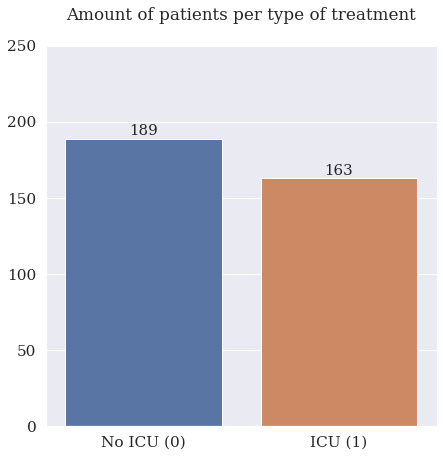

In [22]:
title = "Amount of patients per type of treatment"
plotGraph(data = machine_learning_data.groupby("PATIENT_VISIT_IDENTIFIER").agg({"ICU": max}), type = "bar", title = title, x="ICU", y_limit=250, labels = True)

As can be seen, almost half of the patients in the prepared database, at some time window, were submitted to the ICU.

## 3.2 Correlation analysis


Another analysis that we can do is to list the largest Pearson correlations between the various features and the variable "ICU"; in this way, we can identify  features with a high potential to be linked to a patient going or not to the ICU treatment.

As the correlations can be directly (positive) and inversely (negative) both ranked lists are shown.

In [23]:
# corr() method is used to find the pairwise correlation of all columns in the dataframe
# the parameter "method" is to indicate which kind of correlation (in this case, Pearson)

machine_learning_data_corr = machine_learning_data.corr(method="pearson")["ICU"]
machine_learning_data_corr.sort_values(ascending = False)

ICU                            1.000000
RESPIRATORY_RATE_MAX           0.570316
RESPIRATORY_RATE_DIFF          0.551715
RESPIRATORY_RATE_DIFF_REL      0.545261
BLOODPRESSURE_SISTOLIC_DIFF    0.467795
                                 ...   
TGO_DIFF                            NaN
TGP_DIFF                            NaN
TTPA_DIFF                           NaN
UREA_DIFF                           NaN
DIMER_DIFF                          NaN
Name: ICU, Length: 230, dtype: float64

In [24]:
# with ascending = True we obtain the inverse list, showing, in order, 
# the features with the highest negative correlation (indicating that the higher, 
# the less the chance of the ICU feature being 1)
machine_learning_data_corr.sort_values(ascending = True)

BLOODPRESSURE_DIASTOLIC_MIN   -0.412856
LACTATE_MEAN                  -0.323185
LACTATE_MAX                   -0.323185
LACTATE_MIN                   -0.323185
LACTATE_MEDIAN                -0.323185
                                 ...   
TGO_DIFF                            NaN
TGP_DIFF                            NaN
TTPA_DIFF                           NaN
UREA_DIFF                           NaN
DIMER_DIFF                          NaN
Name: ICU, Length: 230, dtype: float64

The perfect correlation is the ICU variable with itself; apart from this, note that there is no feature that is highly correlated with whether or not a patient is going to the intensive care unit; it appears to be a "synergistic" combination from multiple other variables that results in the need for a patient to go (or not) to the ICU. In complex analyzes like this, machine learning algorithms can help a lot.

Still on the correlation analysis, we can also identify some NaN values; if we look at the Pearson's correlation equation, we understand that the only possible way to result in NaN values is to have the denominator equals zero; for this, the standard deviation of any feature has to be zero and, by consequece, their values shall always be the same, since the standard deviation of a series with equal values is zero.

**<font size=6>$\rho_{x,y} = \frac{cov(X,Y)}{\sigma_x\sigma_y}$**,

where:<br>
**cov** is the covariance <br>
**$\sigma_x$** is the standard deviation of x <br>
**$\sigma_y$** is the standard deviation of y <br>


There are 36 different features that present NaN correlation with the "ICU" column, as we can see below.

In [25]:
corr_null = machine_learning_data_corr[machine_learning_data_corr.isna()].index
print(f"Total number of features that present NaN correlation with 'ICU' feature: {len(corr_null)} \n")
print(corr_null)


Total number of features that present NaN correlation with 'ICU' feature: 36 

Index(['ALBUMIN_DIFF', 'BE_ARTERIAL_DIFF', 'BE_VENOUS_DIFF',
       'BIC_ARTERIAL_DIFF', 'BIC_VENOUS_DIFF', 'BILLIRUBIN_DIFF', 'BLAST_DIFF',
       'CALCIUM_DIFF', 'CREATININ_DIFF', 'FFA_DIFF', 'GGT_DIFF',
       'GLUCOSE_DIFF', 'HEMATOCRITE_DIFF', 'HEMOGLOBIN_DIFF', 'INR_DIFF',
       'LACTATE_DIFF', 'LEUKOCYTES_DIFF', 'LINFOCITOS_DIFF',
       'NEUTROPHILES_DIFF', 'P02_ARTERIAL_DIFF', 'P02_VENOUS_DIFF',
       'PC02_ARTERIAL_DIFF', 'PC02_VENOUS_DIFF', 'PCR_DIFF',
       'PH_ARTERIAL_DIFF', 'PH_VENOUS_DIFF', 'PLATELETS_DIFF',
       'POTASSIUM_DIFF', 'SAT02_ARTERIAL_DIFF', 'SAT02_VENOUS_DIFF',
       'SODIUM_DIFF', 'TGO_DIFF', 'TGP_DIFF', 'TTPA_DIFF', 'UREA_DIFF',
       'DIMER_DIFF'],
      dtype='object')


If we take some examples of these columns, we see that they have a unique value (in this case "-1"). So these columns are repeated with each other as well.

In [26]:
print(machine_learning_data["ALBUMIN_DIFF"].value_counts())
print("\n") # to print an empty row
print(machine_learning_data["GLUCOSE_DIFF"].value_counts())
print("\n")
print(machine_learning_data["POTASSIUM_DIFF"].value_counts())

-1.0    1760
Name: ALBUMIN_DIFF, dtype: int64


-1.0    1760
Name: GLUCOSE_DIFF, dtype: int64


-1.0    1760
Name: POTASSIUM_DIFF, dtype: int64


Probably most of these columns are already listed in the *duplicate_columns* variable that was created before; the script belows list any of these columns that eventually are not present in the *duplicate_columns* list.

In [27]:
for col in corr_null:
    if col not in duplicate_columns:
        print(f"The {col} is not present in the duplicate columns")

The ALBUMIN_DIFF is not present in the duplicate columns


As we can see, the first feature of the list (ALBUMIN_DIFF) is the only one that is not present in the *duplicated_columns* list; the explanation for this is because the study that was done previously preserved the first column of the repeated series, so it was really expected that exactly one column unit with repeated values would not be part of the *duplicate_columns* list.

For the study of machine learning it is known that columns with the same value add no value and can be removed. For now let's just add it into the list of *duplicate columns* (later we will drop these columns from the database).

In [28]:
duplicate_columns.append("ALBUMIN_DIFF")

## 3.3 Studies of the most correlated features with ICU

Let's work a little more on the study of the variables correlated with the admission or not to the ICU.

In [29]:
# remove NaN of the correlation table
# the "~" is to command the opposite, in this case, all rows that are not NaN

machine_learning_data_corr_no_nan = machine_learning_data_corr[~machine_learning_data_corr.isna()]

We can choose some different features of the most correlated variables with ICU:

In [30]:
# most directly correlated variables (the [0:20] is a slice to show only the first 20 rows)
machine_learning_data_corr_no_nan.sort_values(ascending = False)[0:20]

ICU                                 1.000000
RESPIRATORY_RATE_MAX                0.570316
RESPIRATORY_RATE_DIFF               0.551715
RESPIRATORY_RATE_DIFF_REL           0.545261
BLOODPRESSURE_SISTOLIC_DIFF         0.467795
BLOODPRESSURE_SISTOLIC_DIFF_REL     0.461163
BLOODPRESSURE_DIASTOLIC_DIFF_REL    0.430419
BLOODPRESSURE_DIASTOLIC_DIFF        0.419989
HEART_RATE_DIFF_REL                 0.419885
HEART_RATE_DIFF                     0.419293
TEMPERATURE_DIFF_REL                0.410746
TEMPERATURE_DIFF                    0.409567
BLOODPRESSURE_SISTOLIC_MAX          0.359339
RESPIRATORY_RATE_MEAN               0.309588
OXYGEN_SATURATION_DIFF_REL          0.307223
OXYGEN_SATURATION_DIFF              0.306366
RESPIRATORY_RATE_MEDIAN             0.266532
HEART_RATE_MAX                      0.264105
AGE_PERCENTIL                       0.246674
BE_VENOUS_MIN                       0.246501
Name: ICU, dtype: float64

In [31]:
# most inversely correlated variables
machine_learning_data_corr_no_nan.sort_values(ascending = True)[0:20]

BLOODPRESSURE_DIASTOLIC_MIN      -0.412856
LACTATE_MEAN                     -0.323185
LACTATE_MAX                      -0.323185
LACTATE_MIN                      -0.323185
LACTATE_MEDIAN                   -0.323185
TEMPERATURE_MIN                  -0.319998
OXYGEN_SATURATION_MIN            -0.272579
BLOODPRESSURE_DIASTOLIC_MEDIAN   -0.248020
HEART_RATE_MIN                   -0.244031
BLOODPRESSURE_DIASTOLIC_MEAN     -0.237768
BLOODPRESSURE_SISTOLIC_MIN       -0.212231
ALBUMIN_MAX                      -0.209462
ALBUMIN_MIN                      -0.209462
ALBUMIN_MEAN                     -0.209462
ALBUMIN_MEDIAN                   -0.209462
HEMOGLOBIN_MAX                   -0.202906
HEMOGLOBIN_MEDIAN                -0.202906
HEMOGLOBIN_MEAN                  -0.202906
HEMOGLOBIN_MIN                   -0.202906
HEMATOCRITE_MAX                  -0.182940
Name: ICU, dtype: float64

Let's choose 8 features, avoiding those that have "diff" as they are not absolute measures.
Also,


In [32]:
features_list = ["RESPIRATORY_RATE_MAX","BLOODPRESSURE_DIASTOLIC_MIN",
                 "BLOODPRESSURE_SISTOLIC_MIN","TEMPERATURE_MIN",
                 "HEART_RATE_MAX","OXYGEN_SATURATION_MIN", "AGE_PERCENTIL"]

Now that we have these features in our list, we will plot the displayed value of these health data by comparing the value shown in the first non-ICU window with the first window already in the ICU.

In [33]:
# this df is composed only by the first rows of ICU = 0 and ICU = 1 per patient
# with this, we can plot the universe of patients' health status when they are in the ICU compared to when they are out of it.
box_plot_data = machine_learning_data.drop_duplicates(subset=["PATIENT_VISIT_IDENTIFIER","ICU"], keep='first')

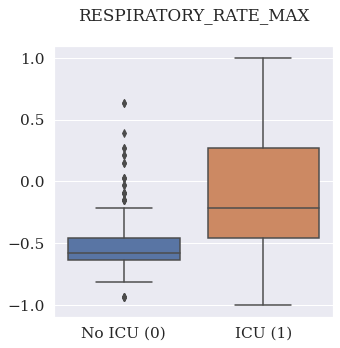

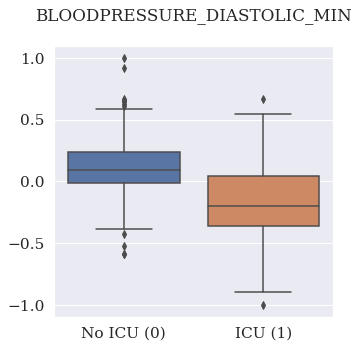

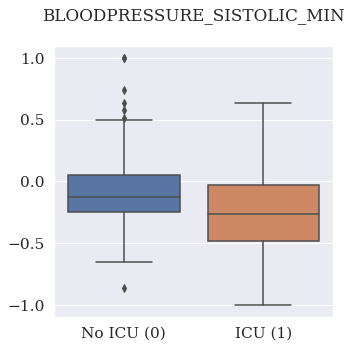

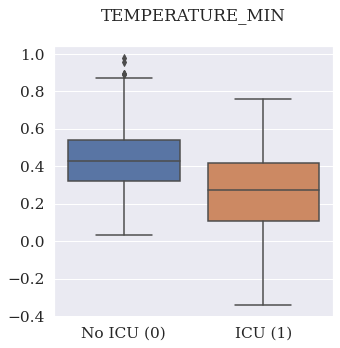

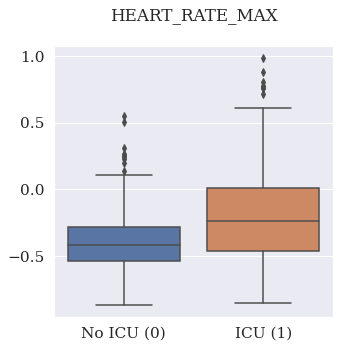

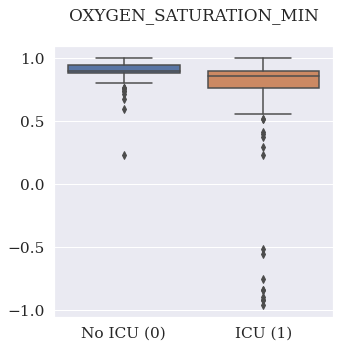

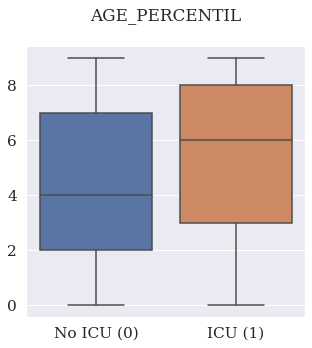

In [34]:
for feature in features_list:
    plotGraph(data = box_plot_data, title = feature, x = "ICU", y=feature, type="box")
    print("\n")

For features such as RESPIRATORY_RATE_MAX, BLOODPRESSURE_DIASTOLIC_MIN, TEMPERATURE_MIN AND OXYGEN_SATURATION_MIN 
the differences in values ​​obtained in patients outside the ICU compared to those obtained in the ICU are notoriously observed.

At first it may not be obvious the reason why outside the ICU the minimum temperature of patients is higher than inside the ICU; it is known that high fever is one of the main symptoms of covid-19; however, the lower temperatures observed for patients in intensive care units may be due to the administration of medications to control the temperature, which bring them down considerably.

When we plot the TEMPERATURE_MAX feature we observe that the highest values ​​are in fact in ICU patients.


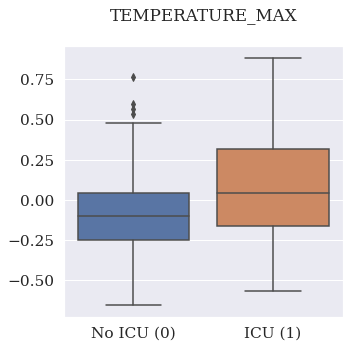

In [35]:
plotGraph(data = box_plot_data, title = "TEMPERATURE_MAX", x = "ICU", y="TEMPERATURE_MAX", type="box")

With that, we finished the second part of the exploratory data analysis; they will help us to have criteria in the definition and adjustments of the machine learning models that will be employed.
Now it's time to apply the first machine learning model.

# 4. Preparation of the first machine learning models


The authors of the database who proposed the challenge in kaggle, recommend the following:

> The earlier, the better! Early identification of those patients who will develop an adverse course of illness (and need intensive care) is a key for an appropriate treatment (saving lives) and to managing beds and resources. <br>
Tips & Tricks: Whereas a predictive model using all time windows will probably yield a greater accuracy, a nice model using only the first (0-2) is likely to be more clinically relevant.

We will assume the premise of using only the values ​​in the first window to predict whether, in any other window, the patient will go to the ICU or not.

A function will be created to analyze whether or not a patient goes to the ICU in any window. If it goes, a new feature called "ANY_WINDOW_IN_ICU" will receive 1, otherwise the value will be 0.

In [36]:
def getAnyICU_WINDOW(dataframe_agrupado):
    #dataframe_agrupado.reset_index(drop=True, inplace=True)
    if(np.any(dataframe_agrupado["ICU"])):
        # if the patient present any ICU == 1 then it will be considered the values of the first window (0-2)
        # the script below identifiy the row of the first window and the ICU column (which is 0) and modify - just this cell - to 1.
        dataframe_agrupado.loc[dataframe_agrupado["WINDOW"] == "0-2", "ICU"] = 1
    
    # it returns just the row of window 0-2
    new_df = dataframe_agrupado.loc[dataframe_agrupado["WINDOW"]=="0-2"]

    # remove WINDOW feature (all of them now are "0-2")
    new_df.drop(columns = "WINDOW", inplace=True)

    # rename the ICU feature (now it is an indicative of the patient's 
    # presence or not in the ICU)
    new_df.rename(columns={"ICU": "ANY_WINDOW_IN_ICU"},inplace=True)
    return new_df

Now it is time to use this function.

In [37]:
# as we are changing the database, it is important to create a copy of the original prepared dataframe using the copy() method
first_approach_machine_learning = machine_learning_data.copy()

# apply the function in the groupby() method
first_approach_machine_learning = first_approach_machine_learning.groupby("PATIENT_VISIT_IDENTIFIER").apply(getAnyICU_WINDOW)

# the dataframe that is returned contains a multiple index; it is necessary to reset it
first_approach_machine_learning.reset_index(drop = True, inplace=True)

# and then it is possible to set a single index, in this case the "PATIENT_VISIT_IDENTIFIER"
first_approach_machine_learning.set_index("PATIENT_VISIT_IDENTIFIER", inplace=True)


It can be seen that the resulting dataframe presents one row per patient and with the new feature ANY_WINDOW_IN_ICU properly classified, according to whether or not the patient goes to the ICU. This new feature is the target for the supervised learning that we are about to set.

In [38]:
first_approach_machine_learning.head()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ANY_WINDOW_IN_ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,
0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,1
3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.882353,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0
5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.976190,-0.979798,-0.860870,-0.714460,-0.986481,-1.000000,-0.975891,-0.980129,0


Before we start, it is necessary to separe the target feature from the other variables.

Thinking Cartesian about the machine learning algorithm being a function, we have the input points "x" and the output "y". So the output y is the target variable.

In [39]:
# input values
x = first_approach_machine_learning.drop(["ANY_WINDOW_IN_ICU"], axis=1)

# output values (target)
y = first_approach_machine_learning["ANY_WINDOW_IN_ICU"]

We want our algorithm to receive historical data to learn patterns and also to test the learned patterns
To proceed with this, it is necessary to split the database into "training base" and "test base"; the first one is used to fit ("teach") the algorithm and the second one is used to test its effectiveness.

The code below perform this task of split; at this moment, let's start with a test sample containing 30% of the database.

In [40]:
# there is a package in the sklearn library that perform the split 
from sklearn.model_selection import train_test_split

# again, the seed usage provides repeatability 
np.random.seed(456123)

# the test size parameter is to choose the percentage of the database 
# that is to used to test the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

A very important point of attention, especially in small databases, is the stratification of the test / training database; if the number of patients going to the ICU on the training basis is very different from the test base, the model may not be trained properly. 

The division currently employed has almost 44% of patients in the training base going to the ICU, while in the test base this occurs for almost 52%; it is worth noting that, according to the distribution of the original base, this value is around 46%.

In [41]:
print("Database (train) distribution:")
print(y_train.value_counts(normalize=True).sort_index(ascending=True))
print("\nDatabase (test) distribution:")
print(y_test.value_counts(normalize=True).sort_index(ascending=True))
print("\n\n Database (original) distribution")
print(y.value_counts(normalize=True).sort_index(ascending=True))


Database (train) distribution:
0    0.560976
1    0.439024
Name: ANY_WINDOW_IN_ICU, dtype: float64

Database (test) distribution:
0    0.481132
1    0.518868
Name: ANY_WINDOW_IN_ICU, dtype: float64


 Database (original) distribution
0    0.536932
1    0.463068
Name: ANY_WINDOW_IN_ICU, dtype: float64


If you change the random.seed, the database distribution for train and test will be different. But there is a way, independently of the seed, to always balance the division: we can use the stratify parameter, according to the code below.

In [42]:
np.random.seed(1417643)

# stratify by the original database (simply being the original y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

print("Database (train) distribution:")
print(y_train.value_counts(normalize=True))
print("\nDatabase (test) distribution:")
print(y_test.value_counts(normalize=True))

Database (train) distribution:
0    0.536585
1    0.463415
Name: ANY_WINDOW_IN_ICU, dtype: float64

Database (test) distribution:
0    0.537736
1    0.462264
Name: ANY_WINDOW_IN_ICU, dtype: float64


Now we have the same proportion in x_train / x_test in ANY_WINDOW_IN_ICU class as observed in the original dataset.

## 4.1 Decision tree classifier: round I

The first model that we will use to predict whether or not a patient will go to the ICU will be done using a decision tree algorithm.
Decision trees are versatile machine learning algorithms that can perform
both classification and regression tasks, and even multioutput tasks. They are
capable of fitting complex datasets. 
In a decision tree, there are two nodes, which are the decision Node and leaf node; the first ones are used to make any decision and may result in other branches, while the leaf nodes are the output of those decisions and do not contain any further branches.

![](images/Dec_Tree.jpg)

You can find more information about this technique at the sources of this information:

- Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow, Aurélien Géron;

- Decision Tree Classification Algorithm, by Javatpoint (https://www.javatpoint.com/machine-learning-decision-tree-classification-algorithm).

The code below import from the sklearn library and fit the DecisionTree classifier.

Note that we set a maximum depth value of the tree. It is important to restrict the model's freedom to avoid that the algorithm builds a giant tree, very specialized to the training data (which is called *overfit*); we will return to this topic in the Decision Tree round II.

In [43]:
# import the model from sklearn library
from sklearn.tree import DecisionTreeClassifier

# seed to provide repeatability 
np.random.seed(1417643)

#19734654

# definition of the model
tree_clf = DecisionTreeClassifier(max_depth=5)

# fit ("teach") the model
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

It is also possible to visualize the created tree using the block of code below.

In [44]:
## run the code below once
#import os
#os.environ["PATH"] += os.pathsep + r'path to \Graphviz\bin'

## run the code below
#import graphviz
#from six import StringIO
#from sklearn.tree import export_graphviz
#from IPython.display import Image
#import pydotplus

#dot_data = StringIO()
#export_graphviz(tree_clf, out_file=dot_data,filled=True,class_names=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())
#graph.write_png("decision_tree.png")

![](images/decision_tree.png)

You can check the 5 levels of nodes created. Each node presents a decision around a feature identified by the column index. 
The first node is x[1], which is AGE_PERCENTIL; above 6.5 (in practice, equal to or greater than 7, since we have no decimal values for this feature), there is a branch with another decision node, this time for feature x[40], which is BILLIRUBIN_MAX; we also known that most of the leaves (on the bottom) of this branch refer to patientis that go to the ICU (for the blue color, which was assigned to class 1).

On the other hand, if the patient has a AGE_PERCENTIL of 6 or less in the first node, a new branch with decision node for PCR_MEDIAN opens; this time we note that most of the leaves of this branch refer to patientis that won't go to the ICU (for the orange color, which was assigned to class 0).

You can identify the column name through the index by the code below, simply replacing the number with the desired index.

In [45]:
# type any index inside the brackets to reveal the column name
x_train.columns[1]

'AGE_PERCENTIL'

Now we can evaluate the model through the accuracy_score method; but before, we submit to the model the x_test database in order to run the model on the tree created above.

In [46]:
# load the accuracy_score package from sklearn library
from sklearn.metrics import accuracy_score

# run the model with x_test database
tree_clf_predict = tree_clf.predict(x_test)

# calculate the accuracy, i.e, the amount of patients that our model predicted correctly.
accuracy_score(y_test,tree_clf_predict)

0.660377358490566

As we can see, the decision tree with that specified training set predict correctly more than 66%.

This number, in itself, is difficult to interpret.
To better understand, let's create a model, called "dummy".

## 4.2 Dummy model

A dummy model  can be basically a rough guess; there are some strategies for the model to guess to correct value, but we will use a pure random guess.
As there are only two possible values in our target (0 or 1), it should possibly be around 50%; but let's confirm it.

The steps required to implement this model are basically the same as for the decision treee model: import from sklearn library, provide a seed, define the model, fit the model and predict using the fitted model with the x_test database

In [47]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="uniform")
dummy.fit(x_train, y_train)
np.random.seed(1417643)
dummy_predict = dummy.predict(x_test)
accuracy_score(y_test,dummy_predict)

0.5283018867924528

As expected, the accuracy of the dummy model is around 50%.

The decision tree model, *apparently*, can be much better than a complete random guess; the word "apparently" was not mentioned for nothing in the text; it will be remembered in the next section, where we will explain better about the performance of models and describe what will be the metrics used to evaluate them.

## 4.3 Model evaluation - confusion matrix and definition of evaluation metrics

The accuracy is a metric of score; however we need to consider the two types of errors, because they can affect differently the
hospital capacity and patient's life:

False positive: when our model consider 1 and the real is 0; i.e., a patient who would not need an ICU bed will occupy one; the impact of this error is to unnecessarily increase the workload in intensive care units, reducing resources for those who really need it.

False negative: when our model consider 0 and the real is 1; i.e., a patient who would need an ICU bed is being sent home; the impact of this error is to put the patient's life at risk, since when the patient needs the ICU, his/her health may be worse than would have been if he/she had been referred to the ICU at the appropriate time.

There is a table that allows visualization of the performance of an algorithm in terms of false positive, false negative, true positive and true negative. It is called confusion matrix.

The sklearn library (you may have already realized how amazing it is) also offers this metric. Let's see the confusion matrix for the decision tree model that was set previoulsy.

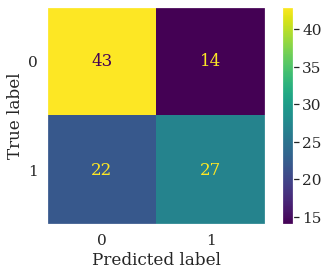

In [48]:
# load the confusion_matrix package from sklearn library
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(tree_clf, x_test, y_test)
plt.grid(False)
plt.show()

As we can see, the model is not working well, specially for the false negative rate.

We don't need to worry, there is a lot to do to improve this model, as will be done throughout this work.

It is also very important to mention that this model is the result of just one training round, based on a random sample division; in other words: it doesn't mean anything, because it is just a photograph of a simple sample of a long chain of tests that must be done before we can assess about the model's performance; this is the reason the word "apprarently" was used during the comparison of the decision tree and dummy models.

> P.S.: If you want to understand the "luck" we had when obtaining these results, just change the value of the seeds present in the cells of database split (in training / test) and also the seed present in the  models cells.
You will see a different decision tree, with very different performance.


Back to the confusion matrix, we can see that it gives a lot of information, but sometimes it is better a more concise metric. 

The *precision* and *recall* are also good and simple metrics that can work for this kind of study.

Precision is the accuracy of the positive predictions and recall is the ratio of positive instances that are correctly detected by the classifier.

It is often convenient to combine *precision* and *recall* into a single metric called the F1-score; it is the harmonic mean of *precision* and *recall*

<font size=5>$precision = \frac{TruePositives}{TruePositives + FalsePositive}$
<br>

</br>
<font size=5>$recall = \frac{TruePositives}{TruePositives + FalseNegatives}$

<br>
</br>

<font size=5>
$F_1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = 2\times \frac{precision\enspace \times \enspace recall}{precision\enspace + \enspace recall} $




The figure below (source: Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow, Aurélien Géron), about the recognition of the digit "5" in handwriting, helps fo understand both confusion matrix and precision/recall metrics.

![](images/CM.jpg)

Let's remember the goal of this work, which is to avoid the collapse in the health care system; this is essential to make it possible to save as many lives as possible. 

Considering the worst scenario of the 2 types of errors:

  * False positive: the patient occupied an ICU bed that he would not need to occupy and there was a lack of beds for those who needed it, and the patient without an ICU bed ended up dying.

  * False negative: the patient went home, his health deteriorated and he/she died.

In the worst scenario for the false positive cases there is still a chance that there will be no collapse of the ICU system and, as a result, there will be no more deaths because of this error. 
But we cannot say that about the false negative error.

So to evaluate the performance of the models, we will use the **recall** metric and the **F1-score**, which is the harmonic mean of precision and recall, being very sensitive to any low value of these metrics; to use them in this work, let's define a new function.

In [49]:
# again, we can import the metrics from the skleatn library
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def getMetrics(y_test, y_predict):
    recall = recall_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)
    return recall, f1

## 4.4 Random forest: round I

The second real model that will be used is the random forest. When we look for an answer to a complex question and ask thousands and thousands of random people and then aggregate those answers together, it will be possibly better(but more costly) than an expert's answer. This is called the wisdom of the crowd.

The same concept can be applied for predictors (families of algorithms that seeks to predict future events), including the newly presented decision tree. The random forest model, which is a ensemble (group of predictors), is an example. 

It is possible to have a group of decision tree classifiers, each on trained on a different random subset of the training set. The random forest model then obtain the predictions of all individual trees and predict the class that gets the most votes

The figure below on the left illustrates what was explained and on the right there is an example of a classifier that identifies fruits in photographs.

![](images/apple_banana.jpg)

<br>

You can find more information about this technique at the sources of this information:

- Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow, Aurélien Géron;

- Random Forest Algorithm, by Javatpoint (https://www.javatpoint.com/machine-learning-random-forest-algorithm).

<br>

The code below perform the same steps for the decision tree model.


In [50]:
# import the model from sklearn library
from sklearn.ensemble import RandomForestClassifier

# seed to provide repeatability (the same used in Decision Tree: round I)
np.random.seed(1417643)

# definition of the model (max_depth was set according to Decision Tree: round I)
# the n_estimators parameter is the number of trees in the forest
random_forest_clf = RandomForestClassifier(n_estimators=100, max_depth=5)

# fit ("teach") the model
random_forest_clf.fit(x_train, y_train)

# run the model with x_test database
random_forest_clf_predict = random_forest_clf.predict(x_test)

# calculate the metrics of this trained model as explained earlier

recall_rf, f1_rf = getMetrics(y_test, random_forest_clf_predict)
print(f"Metrics obtained - Random forest \nRecall: {recall_rf}, F1-score: {f1_rf}")

Metrics obtained - Random forest 
Recall: 0.673469387755102, F1-score: 0.702127659574468


When comparing with the decision tree model, apparently the random forest performs a better prediction.

In [51]:
recall_dt, f1_dt = getMetrics(y_test, tree_clf_predict)
print(f"Metrics obtained - Decision tree \nRecall: {recall_dt}, F1-score: {f1_dt}")

Metrics obtained - Decision tree 
Recall: 0.5510204081632653, F1-score: 0.6


In order not to forget our pure guesser model, we also calculate the metrics obtained

In [52]:
recall_dummy, f1_dummy = getMetrics(y_test, dummy_predict)
print(f"Metrics obtained - Dummy model \nRecall: {recall_dummy}, F1-score: {f1_dummy}")

Metrics obtained - Dummy model 
Recall: 0.5102040816326531, F1-score: 0.5


But again, we cannot conclude anything, as it is just a comparison between two models trained only once using the same random data and without adjusting the parameters of these predictors.

Later we will revisit this model to improve it and in fact understand its real performance.

## 4.5 Logistic regression: round I

The third model that we will work for this classification task is the logistic regression.

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome shall be a categorical or discrete value. 
It can be either Yes or No, 0 or 1, True or False etc;  this makes it a binary classifier. 

The algorithm, however, instead of giving the exact value as 0 and 1, it gives the probabilistic values that an instance belongs to a particular class. Considering the database of this work, it will return the probability of each patient going to the ICU. If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (i.e. it predicts that the patient will go to the ICU).

The logistic is a sigmoid function (i.e., S-shaped) that outputs a number between 0 and 1 and is represented by the figure below.

![](images/logistic_reg.jpg)

The green circles belongs to class 0, since their probabilities to be class 1 are below than 50%; the opposite for blue circles.
<br>
<br>

You can find more information about this technique at the sources of this information:

Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow, Aurélien Géron;

Logistic Regression in Machine Learning, by Javatpoint (https://www.javatpoint.com/logistic-regression-in-machine-learning).

<br>

The code below perform the usual steps applied for the other models.

In [53]:
# import the model from sklearn library
from sklearn.linear_model import LogisticRegression

# seed to provide repeatability (the same used in Decision Tree and Random forest)
np.random.seed(1417643)

# definition of the model 
log_reg_clf = LogisticRegression()

# fit ("teach") the model
log_reg_clf.fit(x_train, y_train)

# run the model with x_test database
log_reg_clf_predict = log_reg_clf.predict(x_test)

# calculate the metrics of this trained model as explained earlier

recall_lr, f1_lr = getMetrics(y_test, log_reg_clf_predict)
print(f"Metrics obtained - Logistic regression \nRecall: {recall_lr}, F1-score: {f1_lr}")

Metrics obtained - Logistic regression 
Recall: 0.6122448979591837, F1-score: 0.6741573033707865


c:\users\rnfavar.embad.000\miniconda3\envs\dev_ds_producao\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


According to the warning that was raised, we understand that this iterative model has not finished converging: *ConvergenceWarning: lbfgs failed to converge (status = 1)*

We can modify the paramenter *max_iter*, which, by default, is 100.

In [54]:
# change the max_iter paramenter
log_reg_clf = LogisticRegression(max_iter=1000)

# the same steps performed before
log_reg_clf.fit(x_train, y_train)
log_reg_clf_predict = log_reg_clf.predict(x_test)
recall_lr, f1_lr = getMetrics(y_test, log_reg_clf_predict)
print(f"Metrics obtained - Logistic regression \nRecall: {recall_lr}, F1-score: {f1_lr}")

Metrics obtained - Logistic regression 
Recall: 0.6326530612244898, F1-score: 0.6966292134831462


We note that the model has now converged and apparently performed better.

## 4.6 Recap the performance of round I models

It has been pointed out a few times that the performance of the models obtained so far is only a fraction of a much broader study that is necessary to be able to assess the real performance of the model.

Even so, to recap these (simple) model studies so far, we created the following data frame.

In [55]:
# create a dataframe on a dictionary using the previously created recall and f1 variables
scores_modelos_roundI = pd.DataFrame({"Model":["Random forest", "Logistic regression","Decision tree classifier", "Dummy"],
                                     "Recall":[recall_rf, recall_lr, recall_dt, recall_dummy],
                                     "F1-score":[f1_rf,f1_lr,f1_dt,f1_dummy]})

# create a dataframe to keep these results (except dummy model)
scores_models_full = scores_modelos_roundI.drop(3)

# creates a column to identify the origin of these results (i.e. performance roundI)
scores_models_full["round #"] = "round I"

scores_modelos_roundI.set_index('Model').rename_axis('').round(3)

,Recall,F1-score
,,
Random forest,0.673,0.702
Logistic regression,0.633,0.697
Decision tree classifier,0.551,0.600
Dummy,0.510,0.500


# 5. Deepening the study of model performance

How then can we know how well our model performs? It is the natural question at this point.

One way to evaluate better the model is to split the database, in different ways, k times; each time using k-1 smaller sets to train and the remaining set to test until each sample is given the opportunity to be used in the test set once and used in the training set k-1 times.

This procedure is called cross-validation.

There are a lot of iterators, which are known by its different strategies to perform this procedure. The importance of stratifying our database has already been explained; so let's do the same for each division; this iterator is called StratifiedKFold.

The figure below illustrates this method. 5 different divisions can be observed, all respecting the stratification of the original base; note that each sample is given the opportunity to be used in the test data 1 time and used to train the model k-1 times.

Note that for every iteration, data in training and test fold changes; at the end sum up the scores from each split and get the mean score.


![](images/cv_rev1.jpg)

More information can be obtained at the scikit learn user guide: https://scikit-learn.org/stable/modules/cross_validation.html#multimetric-cross-validation

Figure source: Satish Gunjal https://satishgunjal.com/kfold/

We are about to run the second round of machine learning; let's copy the database that was used previously.

In [56]:
# as we are changing the database, it is important to create a copy of the original prepared dataframe using the copy() method
second_approach_machine_learning = first_approach_machine_learning.copy()

The code below creates a function that use the cross-validation procedure.

In [57]:
# import the cross-validation procedure from sklern library; 
from sklearn.model_selection import cross_validate

# import the cross-validation splitting strategy the RepeatedStratifiedKFold 
# is a variation of the StratifiedKFold (explained earlier) the difference is 
# that this one is allowed to run multiple times, which increases the 
# reliability of the average score obtained
from sklearn.model_selection import RepeatedStratifiedKFold

def runCrossValidation (model, data, n_splits, n_repeats):
    # the seed usage provides repeatability 
    np.random.seed(1231234)

    # to pick up a randomized data (to shuffle) there is this trick of extracting 
    # a sample of the 100% from the database
    # remember: random data is important to avoid inherent data bias
    data = data.sample(frac=1).reset_index(drop=True)

    # input values
    x = data.drop(["ANY_WINDOW_IN_ICU"], axis=1)

    # output values (target)
    y = data["ANY_WINDOW_IN_ICU"]

    # definition of the cross-validation strategy
    # - the "n_splits" parameter is the number of folds (k)
    # - the "n_repeats" parameter is the number of times cross-validator needs to 
    #   be repeated
    cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats = n_repeats)

    # definition of the scores; as was explained before, the metrics are 
    # recall and F1-score
    scoring = ['recall','f1']
    
    # definition of the cross-validate procedure
    # - the "cv" paramenter is to indicate the strategy that was just defined
    # - the "return_train_score" is used to get insights on how different parameter 
    #   settings impact the overfitting/underfitting trade-off, as we will see soon
    cv_results = cross_validate(model, x, y, cv = cv, scoring = scoring,  return_train_score=True)

    return cv_results

Once the function is adjusted, we can use it. But first, we need to set the value to k, which is the number of folds. In the first round of training the models, we use 30% of the training base, which is approximately 1/3 of the complete base. We will maintain this proportion now, using k=3.

It is also important to say that a single run of the k-fold cross-validation may result in a noisy estimate of model performance; different splits of the data may result in very different results; to avoid this, we wil repeat the process 10 times.

Let's run the cross-validation for the first model we have created, the decision tree, considering the same max_depth parameter used in round I (max_depth=5).

## 5.1 Decision tree classifier: round II

In [58]:
# definition of the model
tree_clf = DecisionTreeClassifier(max_depth=5)

# call the newly cross calidation-function (3 folds, 10 times)
tree_clf_cv = runCrossValidation(model = tree_clf, data = second_approach_machine_learning, n_splits=3, n_repeats=10)

# extract the mean and std of both metrics used in cross-validation
recall_mean = np.mean(tree_clf_cv['test_recall'])
recall_std = np.std(tree_clf_cv['test_recall'])

f1_mean = np.mean(tree_clf_cv['test_f1'])
f1_std = np.std(tree_clf_cv['test_f1'])

# according to the "68–95–99.7 rule" (https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule),
# 95% of values fall within two standard deviations of the mean
print(f"Recall (mean): {recall_mean:.3f}\n\
95% Recall confidence interval: {(recall_mean - (2 * recall_std)):.3f} - {(recall_mean + (2 * recall_std)):.3f}")

print(f"\nF1-score (mean): {f1_mean:.3f}\n\
95% F1-score confidence interval: {(f1_mean - (2 * f1_std)):.3f} - {(f1_mean + (2 * f1_std)):.3f}")

Recall (mean): 0.590
95% Recall confidence interval: 0.429 - 0.751

F1-score (mean): 0.616
95% F1-score confidence interval: 0.501 - 0.732


Now, the performance information of this model is much more comprehensive, after all, we are not only observing a single training round.

And why not compare a predictor with itself, but using different hyperparameters?

This can be useful to adjust the hyperparameter that best fits our base. However, we have to be careful with overfitting and underfitting:

A splendid overfitting and underfitting definitions can be read at the book *Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow, by Aurélien Géron*
>Overfitting: overgeneralizing is
something that we humans do all too often, and unfortunately machines can fall into
the same trap if we are not careful. In Machine Learning this is called overfitting: it
means that the model performs well on the training data, but it does not generalize
well.

>Underfitting: is the opposite of overfitting; it occurs when your
model is too simple to learn the underlying structure of the data

One way to understand when our model is overfitted is when training data performs exceptionally well, usually at the expense of performance test. This is the reason we set "return_train_score=True" at the runCrossValidation function.

Let's simulate the same decision tree with 15 levels of maximum depth.



In [59]:
# set the max_depth ranging from 1 to 15 (the last number in the method - 16 - is not included)
max_depth = range(1,16)

# definition of 4 lists to receive the scores
test_scores_recall = []
test_scores_f1 = []
train_scores_recall = []
train_scores_f1 = []

# perform a cross validation, with the same amount of folds and repetitions 
# defined earlier, but varying the max_depth from 1 to 15
for i in max_depth:
    tree_clf = DecisionTreeClassifier(max_depth=i)
    tree_clf_cv = runCrossValidation(model = tree_clf, data = second_approach_machine_learning, n_splits=3, n_repeats=10)
    test_scores_recall.append(tree_clf_cv['test_recall'])
    test_scores_f1.append(tree_clf_cv['test_f1'])
    train_scores_recall.append(tree_clf_cv['train_recall'])
    train_scores_f1.append(tree_clf_cv['train_f1'])

# to include all the results on a dataframe so that we can plot their values
scores_list = [test_scores_recall, test_scores_f1, train_scores_recall, train_scores_f1]
scores_metric = ["Recall", "F1-score","Recall", "F1-score"]
scores_type = ["Test", "Test", "Train", "Train"]
decision_tree_scores = pd.DataFrame()

for i in range(4):
    scores_df = pd.DataFrame(scores_list[i]).T
    scores_df.columns = max_depth
    scores_df = scores_df.melt()
    scores_df.columns = ["max_depth", "score"]
    scores_df["score_metric"] = scores_metric[i]
    scores_df["score_type"] = scores_type[i]
    decision_tree_scores = pd.concat([decision_tree_scores,scores_df], ignore_index=True)

As can be seen below, we have the results for the different metrics and types of score (whether it is based on test or training data).

In [60]:
decision_tree_scores

,max_depth,score,score_metric,score_type
0,1,0.254545,Recall,Test
1,1,0.351852,Recall,Test
2,1,0.333333,Recall,Test
3,1,0.327273,Recall,Test
4,1,0.240741,Recall,Test
...,...,...,...,...
1795,15,1.000000,F1-score,Train
1796,15,1.000000,F1-score,Train
1797,15,1.000000,F1-score,Train
1798,15,1.000000,F1-score,Train


Now we are going to plot the scores using boxplot to observe the performance of the test and training data for the recall metric; as right after we will plot for the F1-score, we will create a function so that we can reuse the code.

In [61]:
from matplotlib.patches import Rectangle

def plotScoresGraph(model, score_df, parameter_to_vary, score_metric, legend_bottom_right=False):

    # boxplot and its parameters; observe the "hue=score_type", this is the way we can compare the same metric (recall)
    # obtained when running with test and training data.
    ax = sns.boxplot(y="score", x=parameter_to_vary, data=score_df.query("score_metric==@score_metric"), hue="score_type")

  
    # get the len of x axis to adjust figure size
    amount_xlabels = len(score_df[parameter_to_vary].value_counts().index)
  
    if amount_xlabels < 25:
        ax.figure.set_size_inches(24,8)
  
    if amount_xlabels < 20:
        ax.figure.set_size_inches(18,8)

    if amount_xlabels < 10:
        ax.figure.set_size_inches(12,8)

    if amount_xlabels < 5:
        ax.figure.set_size_inches(8,8)

    # add light gray columns to facilitate view 
    for i in range(0,amount_xlabels,2):
        ax.add_patch(Rectangle((i - 0.5, 0 - 0.5), 1, 2, facecolor="skyblue",alpha=0.25))
  
    ax.tick_params(direction="in", labeltop=True, bottom=True)

    # definition of the other parameters of the plot
    ax.set_xlabel("\n" + parameter_to_vary)
    ax.set_ylabel(score_metric + "\n")
    ax.set_title(model + " - " + score_metric + " evaluation\n")
    ax.set_ylim(0,1.1)

    # for some plots the legend shall be on the right
    if legend_bottom_right == True:
        ax.legend(loc='lower right', frameon=False, ncol=2)
    else:
        ax.legend(loc='lower left', frameon=False, ncol=2)
  
    # enable vertical grid to facilitate comparasion between different max_depth
    ax.xaxis.grid(True)
    
    plt.savefig("outputs/" + model + score_metric, bbox_inches="tight", pad_inches=0.2)

    ax;

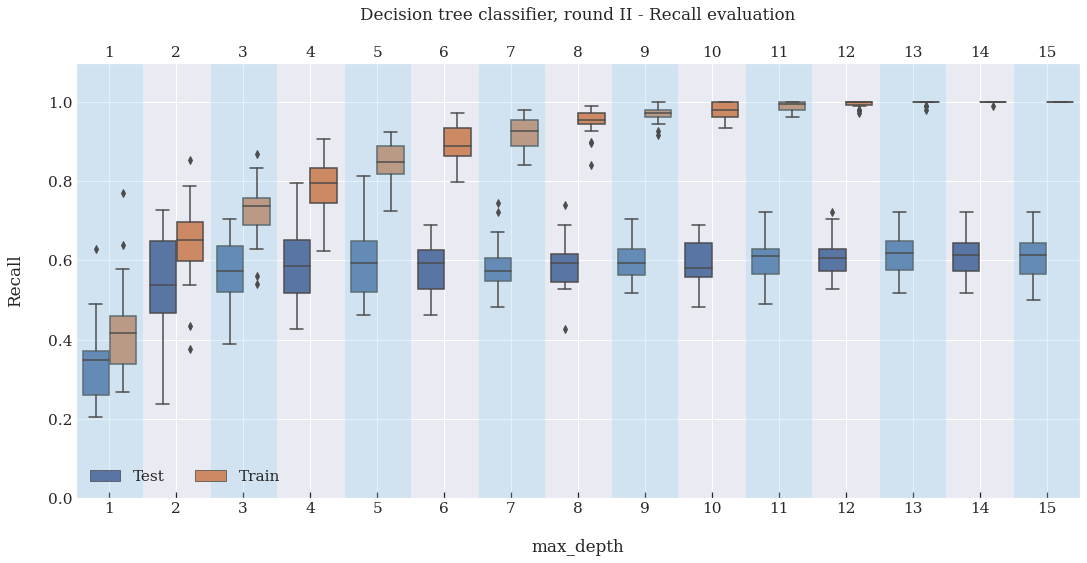

In [62]:
plotScoresGraph("Decision tree classifier, round II",decision_tree_scores, "max_depth", "Recall")

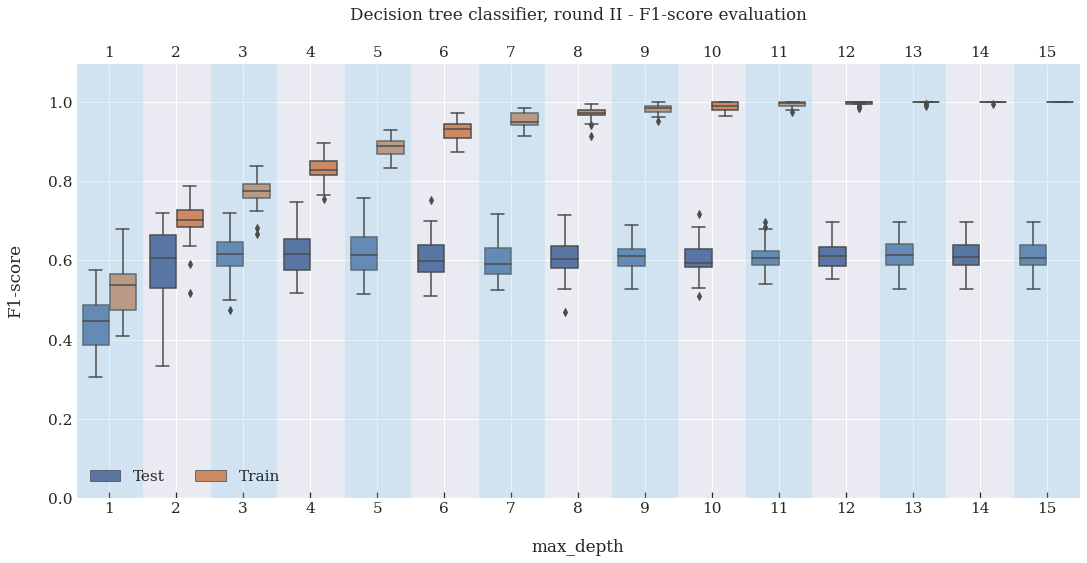

In [63]:
plotScoresGraph("Decision tree classifier, round II",decision_tree_scores, "max_depth", "F1-score")

We can clearly see that starting from max_depth = 4 there is a considerable gap between the performance of the training and test data, for both recall and F1-score metrcis, indicating the start of the overfit.

Also note that at max_depths > 10 the performance of the training data is close to perfection while the test data does not perform as well as at max_depth=3 or 4; this is because the model was so adjusted to the training data that it is not able to generalize to the test data.

Therefore, for the decision tree model adjusted according to our database, we will use max_depth = 4.

In [64]:
tree_clf = DecisionTreeClassifier(max_depth=4)

Before we test other parameters for the random forest and 
logistic regression, let's create a function that will work for any model to allow future uses and thus avoid code repetition.

In [65]:
def getScores(data, model, parameter_to_vary, list_of_parameter_values, max_depth=None, n_estimators=None, max_iter=None, solver=None, c_values=None):
  
    parameter = parameter_to_vary

    test_scores_recall = []
    test_scores_f1 = []
    train_scores_recall = []
    train_scores_f1 = []

    # adjust model string
    if model == "DecisionTreeClassifier": 
        model = model + "("
  
    if model == "RandomForestClassifier":
        if max_depth != None:
            model = model + "(" + "max_depth =" + str(max_depth) + ","

    if n_estimators != None:
        model = model + "(" + "n_estimators =" + str(n_estimators) + ","

    if model == "LogisticRegression":
        model = model + "(" + "max_iter =" + str(max_iter) + ","
      
        if solver != None:
            model = model + "solver =" + solver + ","
  
    # perform a cross validation, with the same amount of folds and repetitions 
    for i in list_of_parameter_values:
        # eval() allows to evaluate arbitrary Python expressions from a string-based or compiled-code-based input.
        model_clf = eval(model + parameter + "=i)")
        model_clf_cv = runCrossValidation(model =  model_clf, data = data, n_splits=3, n_repeats=10)
        test_scores_recall.append(model_clf_cv['test_recall'])
        test_scores_f1.append(model_clf_cv['test_f1'])
        train_scores_recall.append(model_clf_cv['train_recall'])
        train_scores_f1.append(model_clf_cv['train_f1'])

    # to include all the results on a dataframe so that we can plot their values
    scores_list = [test_scores_recall, test_scores_f1, train_scores_recall, train_scores_f1]
    scores_metric = ["Recall", "F1-score","Recall", "F1-score"]
    scores_type = ["Test", "Test", "Train", "Train"]
    complete_scores_df = pd.DataFrame()

    for i in range(4):
        scores_df = pd.DataFrame(scores_list[i]).T
        scores_df.columns = list_of_parameter_values
        scores_df = scores_df.melt()
        scores_df.columns = [parameter_to_vary, "score"]
        scores_df["score_metric"] = scores_metric[i]
        scores_df["score_type"] = scores_type[i]
        complete_scores_df = pd.concat([complete_scores_df,scores_df], ignore_index=True)

    return(complete_scores_df)

To confirm that the function worked, we verified that the output of the function, when passing the same parameters necessary for the evaluation of the decision tree classifier, is the same:

In [66]:
getScores(second_approach_machine_learning, "DecisionTreeClassifier","max_depth", range(1,16)).equals(decision_tree_scores)

True

Now everything is set to vary hyperparameters of random forest and logistic regression.

## 5.2 Random forest round II

When this model was introduced it was mentioned that the "n_estimators" hyperparameter is the number of trees in the forest; let's assess how sensitive the model's prediction is to this hyperparameter.

When setting max_depth = 4 (from the decision tree feature decision) and varying the n_estimators from 10 to 400, we have the following performance:

In [67]:
random_forest_scores = getScores(second_approach_machine_learning, "RandomForestClassifier","n_estimators",[10,30,50,100,150,200,300,400], max_depth=4)

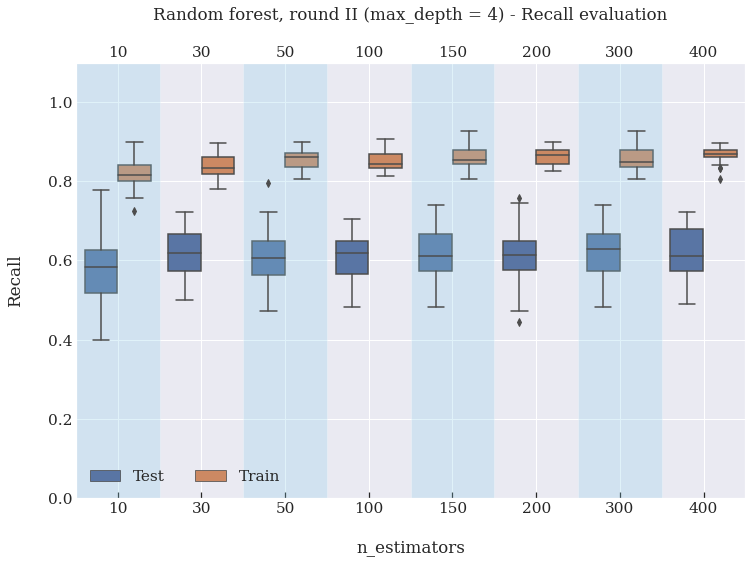

In [68]:
plotScoresGraph("Random forest, round II (max_depth = 4)",random_forest_scores, "n_estimators", "Recall")

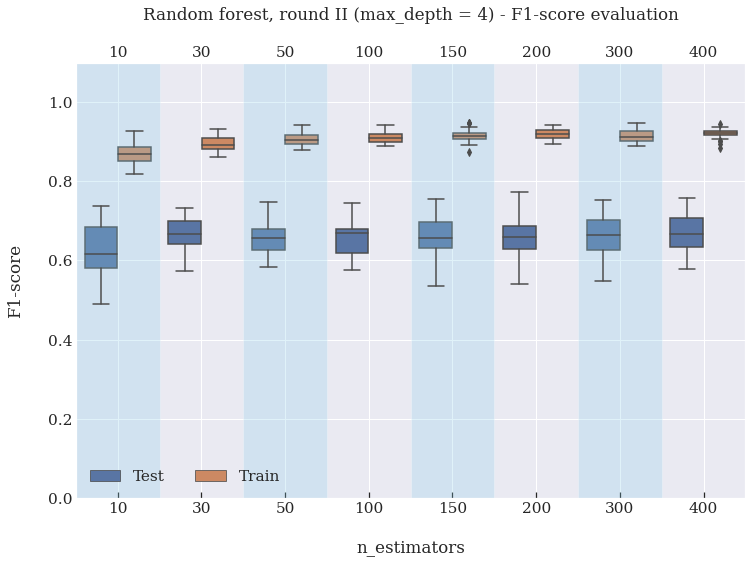

In [69]:
plotScoresGraph("Random forest, round II (max_depth = 4)",random_forest_scores, "n_estimators", "F1-score")

Note that there are no significant differences; we can just notice a underperformance when using n_estimators = 10.

When analyzing the number of estimators, for those with the lowest variance and without outliers, the one with the lowest computational cost is when n_estimators = 100

Let's vary the max_depth now.

In [70]:
random_forest_scores = getScores(second_approach_machine_learning, "RandomForestClassifier","max_depth",range(1, 21), n_estimators=100)

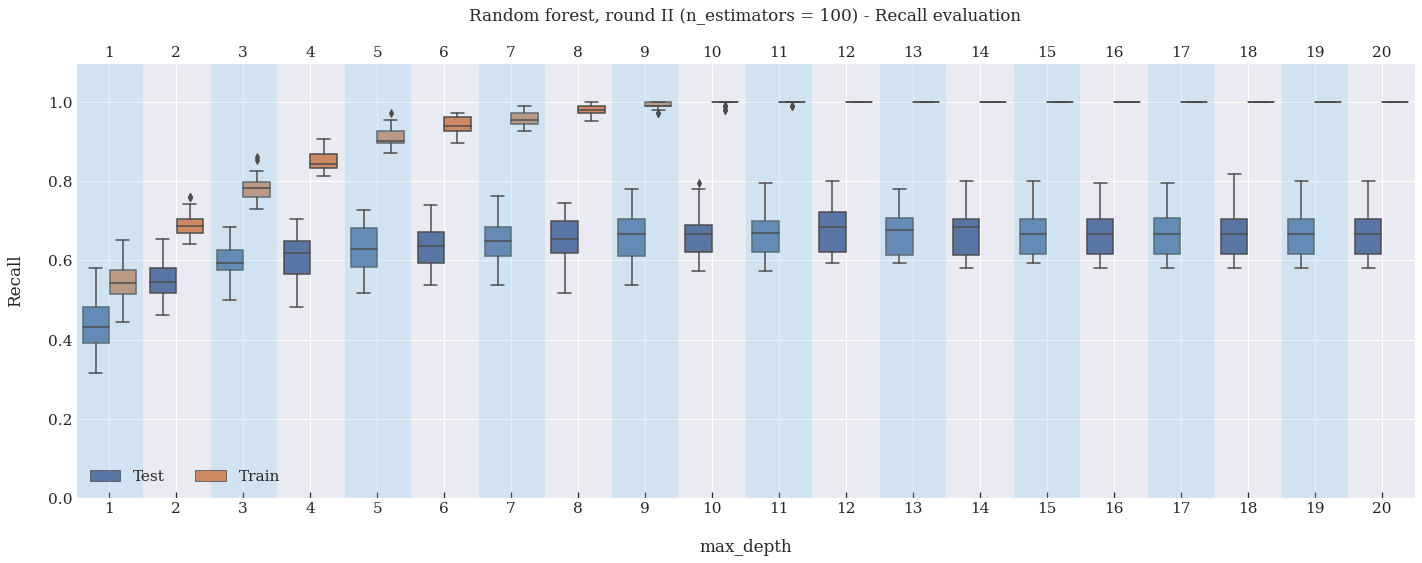

In [71]:
plotScoresGraph("Random forest, round II (n_estimators = 100)",random_forest_scores, "max_depth", "Recall")

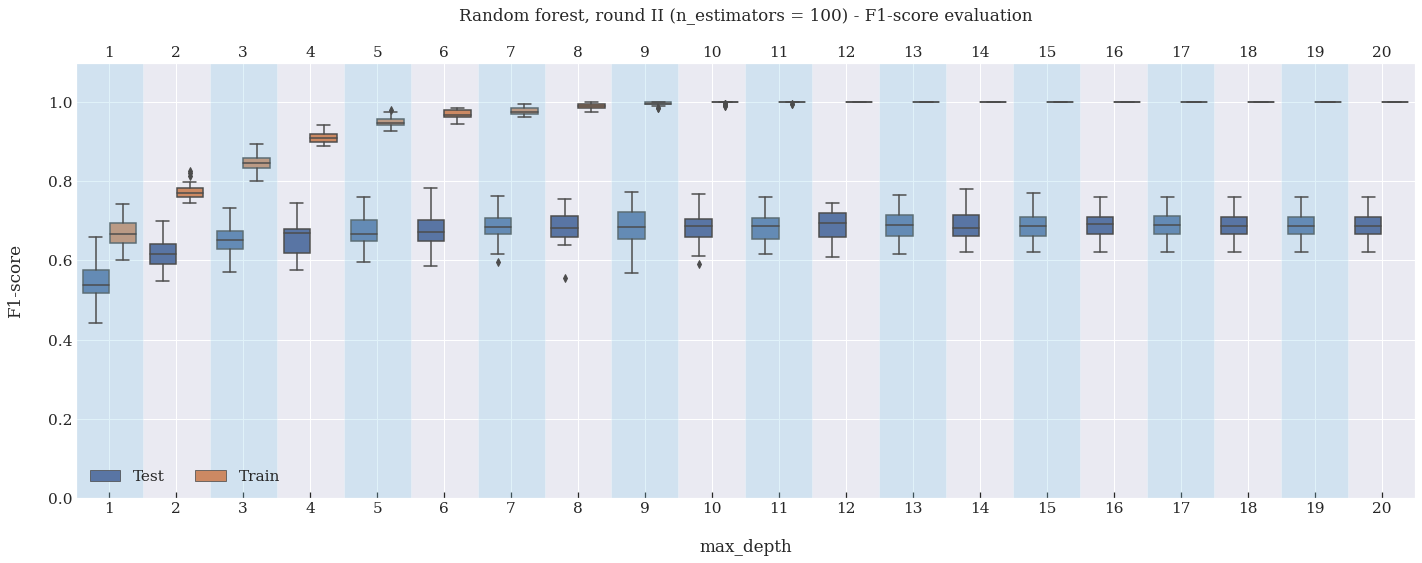

In [72]:
plotScoresGraph("Random forest, round II (n_estimators = 100)",random_forest_scores, "max_depth", "F1-score")

The main differences observed from the random forest compared to the decision tree are:
- minor recall and F1-score variance for all max_depth values, particularly at the lowest max_depths;
- after reaching the maximum scores in the test data for recall and F1-score around max_depth = 10, there is no score drop (or rise) at higher max_depths, even when the training data is already overfitted.

Therefore, for the random forest model adjusted according to our database, we will use n_estimators = 100 and max_depth = 10.


In [73]:
random_forest_clf = RandomForestClassifier(n_estimators=100, max_depth=10)

## 5.3 Logistic regression: round II

We will modify two hyperparameters of the logistic regression: "solver" and "C"; the first one is the algorithm to use in the optimization problem and the second one is a regularization parameter defined as 1/$\lambda$, where $\lambda$ controls the trade-off between increasing complexity as much as it wants while trying to keep it simple. For example, if λ is very low or 0 (high C value), the model will have enough power to increase it's complexity (overfit) by assigning big values to the weights for each parameter. On the other hand, when we increase the value of λ (lower C value), the model will tend to underfit, because it will become too simple.

Also, considering the lack of convergence when max_iter was set according to its dafault value (max_iter = 100) during round I, it will be used max_iter=1000.

Let's start varying the solver, keeping the C at its default value (C = 1)

In [74]:
logistic_regression_scores = getScores(second_approach_machine_learning, "LogisticRegression","solver",['newton-cg', 'lbfgs', 'liblinear', 'sag'], max_iter=1000)

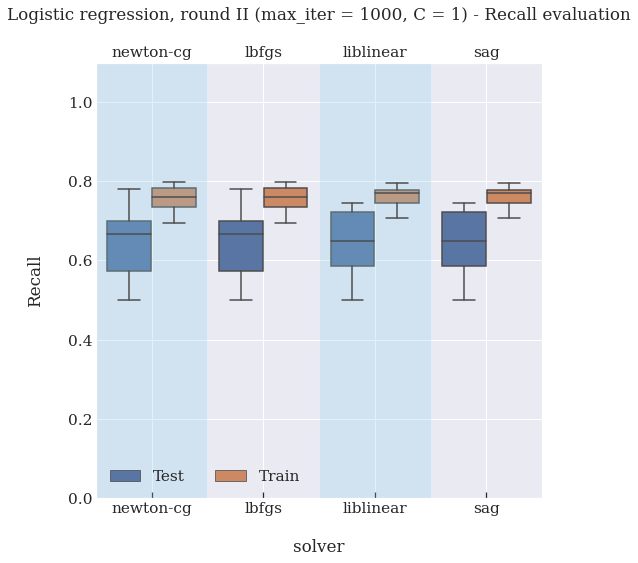

In [75]:
plotScoresGraph("Logistic regression, round II (max_iter = 1000, C = 1)", logistic_regression_scores, "solver", "Recall")

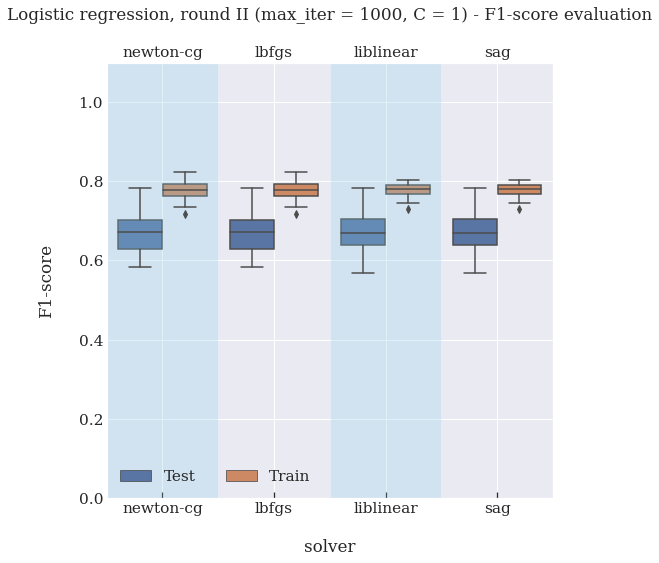

In [76]:
plotScoresGraph("Logistic regression, round II (max_iter = 1000, C = 1)", logistic_regression_scores, "solver", "F1-score")

The performance changes observed in the different solvers are quite subtle; note the decrease in the upper whisker test data (recall metric) for the 'liblinear' and 'sag' solvers

On the other side we have "newton-cg" and "lbfgs" performing equally.

As the solver"newton is more computationally expensive we will choose the "lbfs", which means Limited-memory Broyden–Fletcher–Goldfarb–Shanno algorithm.

> If you want understand better each one of these solvers, getting down to mathematical concepts, I suggest this [stack overflow topic](
https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions).

So let's set the solver to "lbfgs" and vary parameter C now.


In [77]:
logistic_regression_scores = getScores(second_approach_machine_learning, "LogisticRegression","C",[0.01, 0.1, 1.0, 10, 100, 1000, 10000], max_iter=10000, solver= "'lbfgs'")

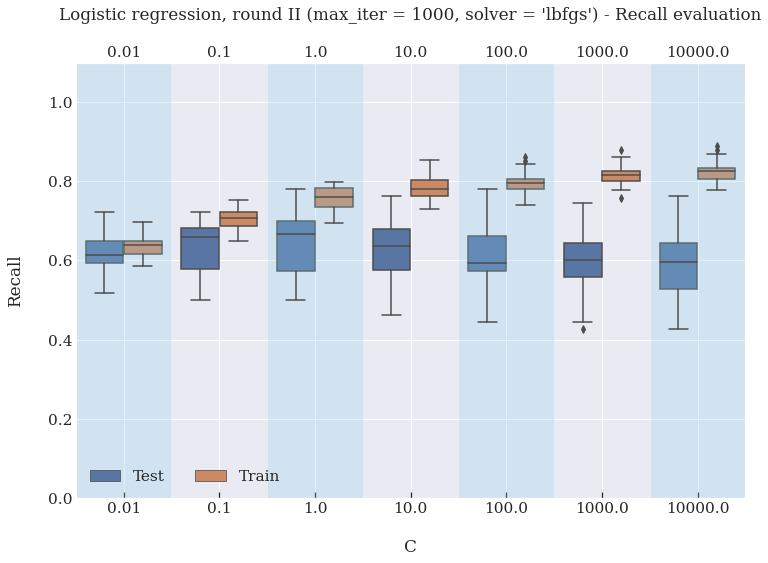

In [78]:
plotScoresGraph("Logistic regression, round II (max_iter = 1000, solver = 'lbfgs')", logistic_regression_scores, "C", "Recall")

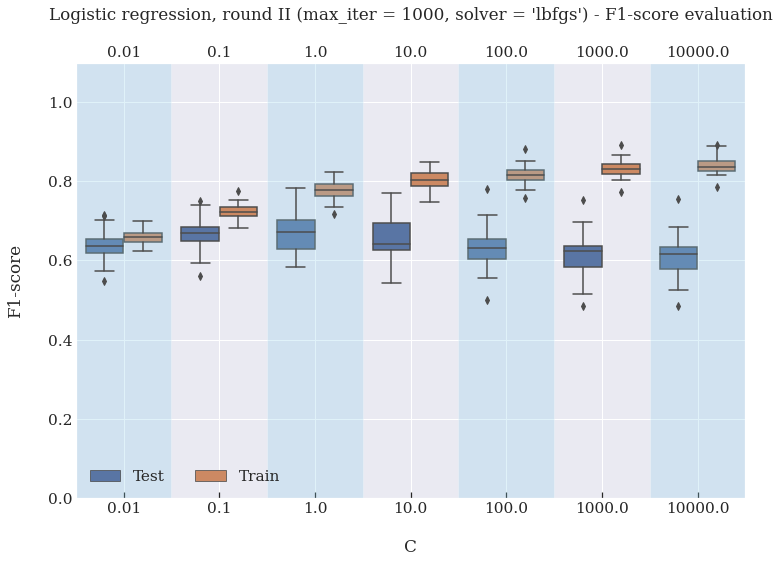

In [79]:
plotScoresGraph("Logistic regression, round II (max_iter = 1000, solver = 'lbfgs')", logistic_regression_scores, "C", "F1-score")

As already explained, when the value of C increases, so does the tendency to overfit, observed by the increased performance of the training data.

Performance when C = 0.1 and C = 1 are similar and are at the threshold of the start of the performance drop (notice the median); we also note that the variance of the upper whisker in the recall metric, when C = 0.1, is smaller in relation to C = 1; but as it is still unclear which value to use, we will study C values between 0.1 an 10.

In [80]:
logistic_regression_scores = getScores(second_approach_machine_learning, "LogisticRegression","C",[0.1, 0.5, 1.0, 2, 3, 5, 10], max_iter=10000, solver= "'lbfgs'")

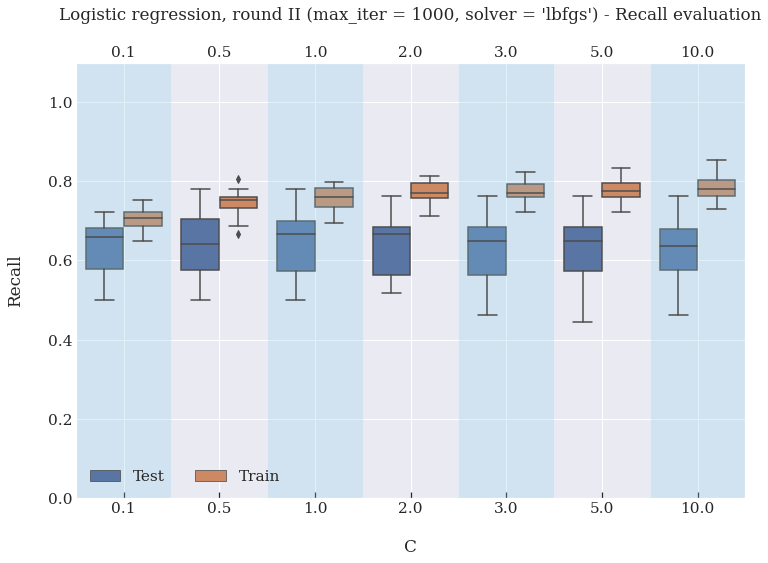

In [81]:
plotScoresGraph("Logistic regression, round II (max_iter = 1000, solver = 'lbfgs')", logistic_regression_scores, "C", "Recall")

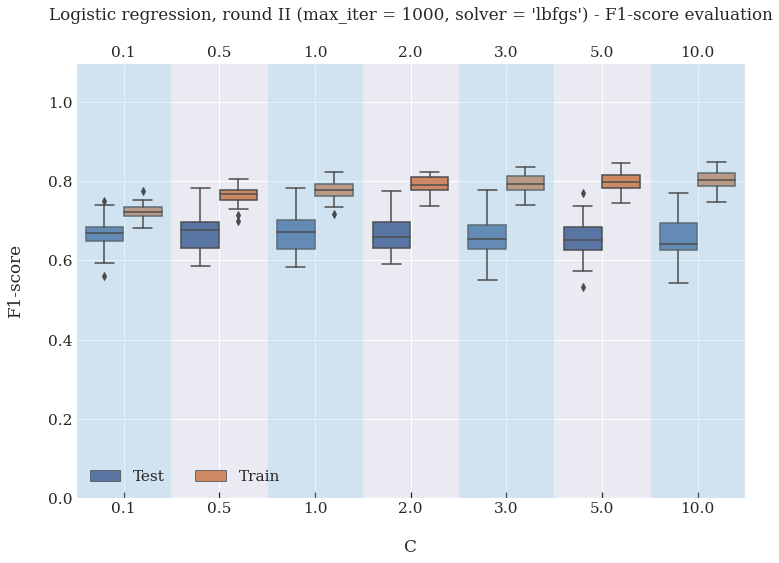

In [82]:
plotScoresGraph("Logistic regression, round II (max_iter = 1000, solver = 'lbfgs')", logistic_regression_scores, "C", "F1-score")

We see very subtle performance differences by varying this regularization parameter C between 0.1 and 10

When C = 1, for both metrics, the lower whisker is a little bit longer than C = 2; as we want to maximize the values of such metrics, especially the recall, we will choose C = 2.

Therefore, for the logistic regression model adjusted according to our database, we will use max_iter=1000, solver='lbfgs' and C = 2.

In [83]:
log_reg_clf = LogisticRegression(max_iter=1000, solver='lbfgs', C=2)

## 5.4 Performance of models round II

This time we have better confidence in the performance of the adjusted models, because the tests and evaluations were done in multiplicity, becoming much less susceptible to the volatility of results, as explained during models training/test round I.

So let's check the final performance, after the hyperparameter optimization that was done during round II. 

For future reuse of the code, we will create one more function.

In [84]:
def getSummaryScores(data):
    """ It isnecessary to have 'Decision tree', 'Random forest' and 'Logistic regression' already trained to use this function """
    # this is a module docstring, shown when you use help() on a module

    models_list = [tree_clf, random_forest_clf, log_reg_clf]

    recall_score_list = []
    f1_score_list = []

    # perform cross-validation at the trained models
    for model in models_list:
        scores = runCrossValidation(model,data,n_splits=3, n_repeats=10)
        recall_score_list.append(scores['test_recall'])
        f1_score_list.append(scores['test_f1'])

    # build a dataframe to use for the pivot table
    models = ["Decision tree classifier", "Random forest", "Logistic regression"]
    scores_recall_roundX = pd.DataFrame(recall_score_list, index=models).T.melt().set_index("variable")
    scores_recall_roundX.columns = ["Recall"]

    scores_f1_roundX = pd.DataFrame(f1_score_list, index=models).T.melt().set_index("variable")
    scores_f1_roundX.columns = ["F1-score"]
    scores_f1_roundX

    scores_models_roundX = pd.concat([scores_recall_roundX,scores_f1_roundX], axis=1)
    scores_models_roundX.reset_index(inplace=True)

    # create a pivot table
    table_scores = pd.pivot_table(scores_models_roundX, values=['Recall', 'F1-score'], index=['variable'],
                                  aggfunc={'Recall': [np.mean, np.std],
                                           'F1-score': [np.mean, np.std]})

    table_scores.rename_axis('',inplace=True)

    # rearrange the order of the pivot table columns and sort by recall metric
    table_scores = table_scores[[('Recall', 'mean'), ('Recall',  'std'), ('F1-score', 'mean'),('F1-score', 'std')]].sort_values(by=('Recall', 'mean'),ascending=False).round(3)
  
    # rename the columns list to make it equal to "scores_models_full"
    scores_models_roundX.columns = ["Model", "Recall", "F1-score"]
  
    return (table_scores, scores_models_roundX)

In [85]:
summary_roundII, scores_models_roundII = getSummaryScores(second_approach_machine_learning)

# to store the results
scores_models_roundII["round #"] = "round II"
scores_models_full = pd.concat([scores_models_full, scores_models_roundII])

summary_roundII

Recall        F1-score       
                           mean    std     mean    std
                                                      
Random forest             0.660  0.056    0.684  0.041
Logistic regression       0.637  0.074    0.667  0.049
Decision tree classifier  0.592  0.088    0.616  0.056

Among the 3 predictors used, the one that had the best performance, according to the hyperparameter adjustments previously shown, was the random forest.

As the world of machine learning is iterative, we will revisit our database and perform more tests in an attempt to increase such performance.

# 6. Attempts to improve the models

The first attempt to improve the performance obtained will finally be to use the list that contains all the duplicated columns. We will also check how correlated the columns are to eliminate some more; highly correlated columns can be detrimental to machine learning algorithms.

## 6.1 Features selection part I: duplicated and high correlationed columns removal

In [86]:
# as we are changing the database, it is important to create a copy of the original prepared dataframe using the copy() method
third_approach_machine_learning = first_approach_machine_learning.copy()
third_approach_machine_learning.shape[1]

229

There are 229 original columns.

In [87]:
# apply the columns removal
third_approach_machine_learning = third_approach_machine_learning.drop(columns=duplicate_columns)
third_approach_machine_learning.shape[1]

85

After removing the duplicated columns, we can evaluate, among the remaining ones (85), what is the correlation between them; we will remove those that are highly correlated with each other (> 0.90 according to Pearson's correlation). For this, a function will be created to be able to test, if desired, with other cutoff values.

In [88]:
# this function considers the analysis only for the upper triangle of the correlation matrix; 
# in this way, one of the two columns that showed high correlation will be preserved.

def removeHighCorr(data,cut_off_value):
    matrix_corr = data.iloc[:,3:-1].corr().abs()
    matrix_up = matrix_corr.where(np.triu(np.ones(matrix_corr.shape),k=1).astype(bool))
    columns_removal = [column for column in matrix_up.columns if any(matrix_up[column]>cut_off_value)]
  
    return data.drop(columns_removal, axis=1)

third_approach_machine_learning = removeHighCorr(third_approach_machine_learning,0.90)
third_approach_machine_learning.shape[1]

59

From the 229 original columns, 59 remained.

Now we are going to do the same thing we did during round II, that is, vary the hyperparameters and evaluate which are better for this newly reworked data set.

Then, the new performance of the 3 predictors will be presented.

Comments will be made only after the end of testing the hyperparameters of each predictor.

### 6.1.1 Decision tree round III

In [89]:
decision_tree_scores = getScores(third_approach_machine_learning, "DecisionTreeClassifier","max_depth", range(1,16))

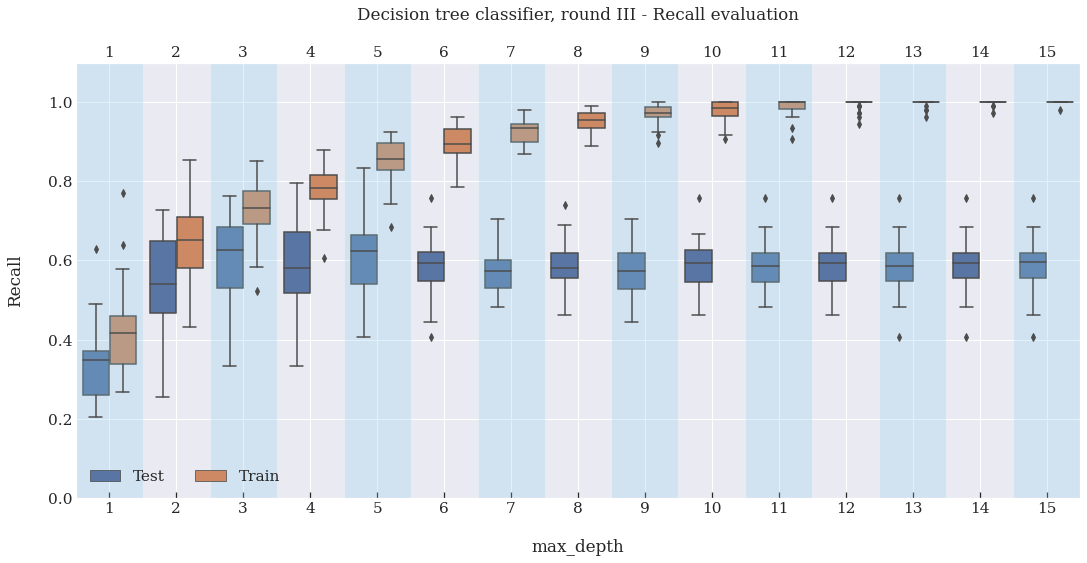

In [90]:
plotScoresGraph("Decision tree classifier, round III",decision_tree_scores, "max_depth", "Recall")

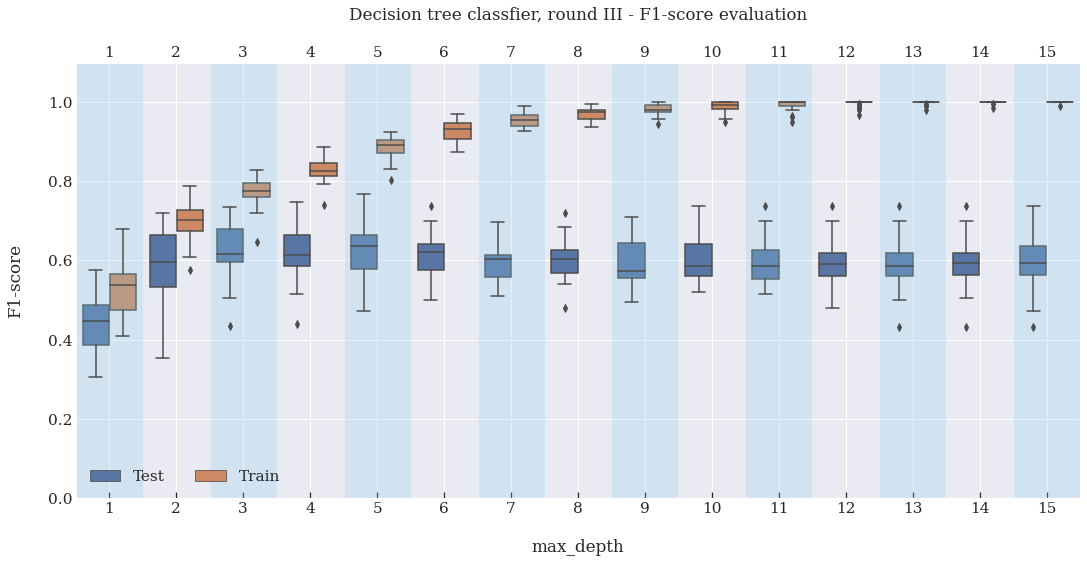

In [91]:
plotScoresGraph("Decision tree classfier, round III",decision_tree_scores, "max_depth", "F1-score")

After analyzing the performance with the different hyperparameters, it was chosen max_depth = 5.

In [92]:
tree_clf = DecisionTreeClassifier(max_depth=5)

### 6.1.2 Random Forest round III

In [93]:
random_forest_scores = getScores(third_approach_machine_learning, "RandomForestClassifier","n_estimators",[10,30,50,100,150,200,300,400], max_depth=5)

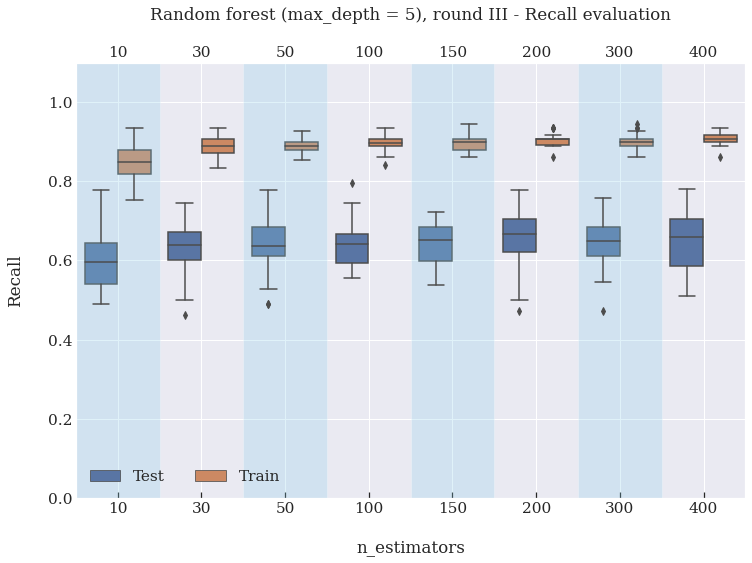

In [94]:
plotScoresGraph("Random forest (max_depth = 5), round III",random_forest_scores, "n_estimators", "Recall")

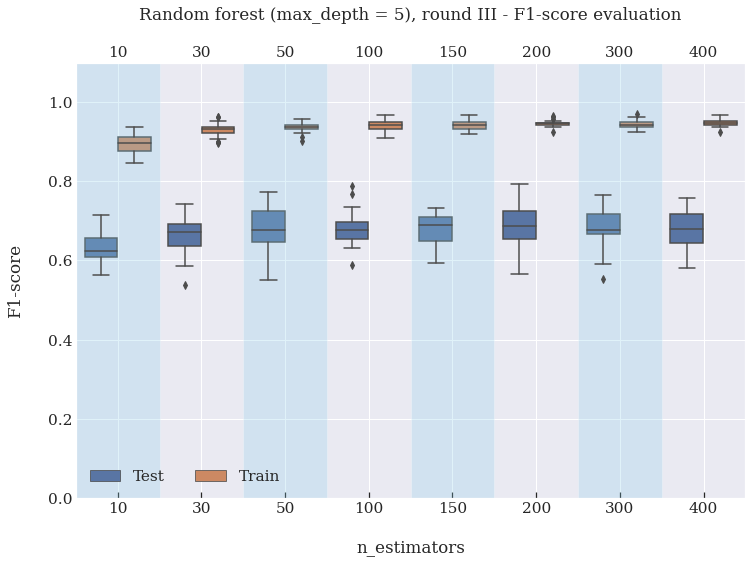

In [95]:
plotScoresGraph("Random forest (max_depth = 5), round III",random_forest_scores, "n_estimators", "F1-score")

In [96]:
random_forest_scores = getScores(third_approach_machine_learning, "RandomForestClassifier","max_depth",range(1, 21), n_estimators=100)

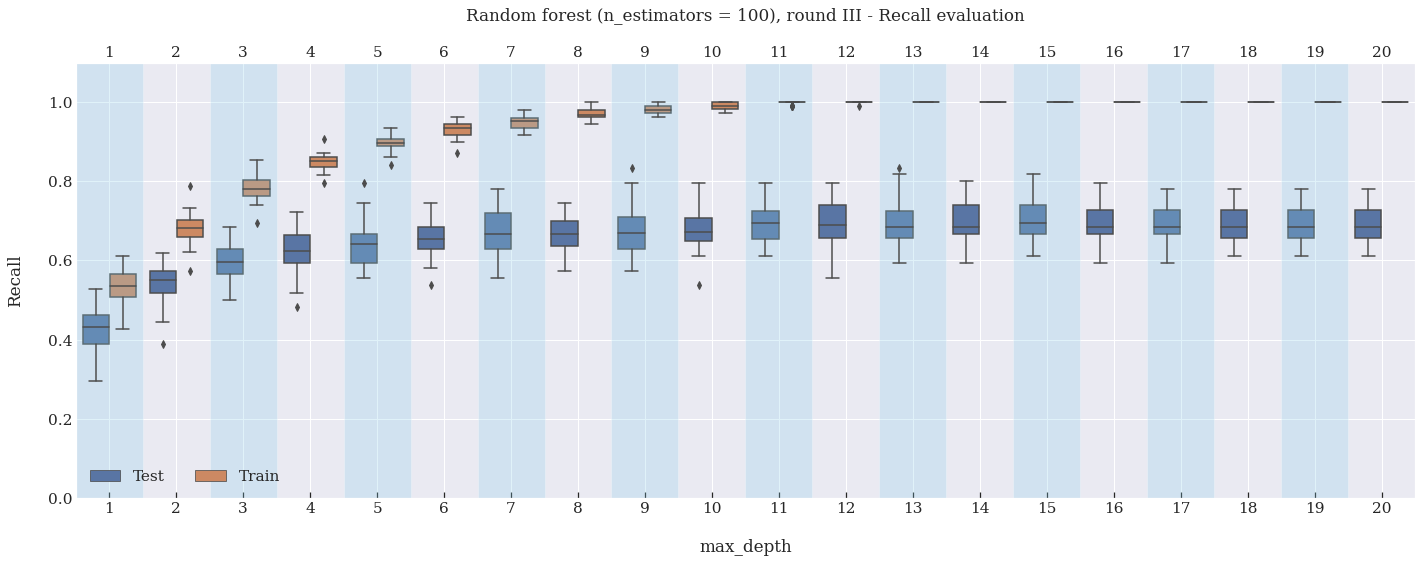

In [97]:
plotScoresGraph("Random forest (n_estimators = 100), round III",random_forest_scores, "max_depth", "Recall")

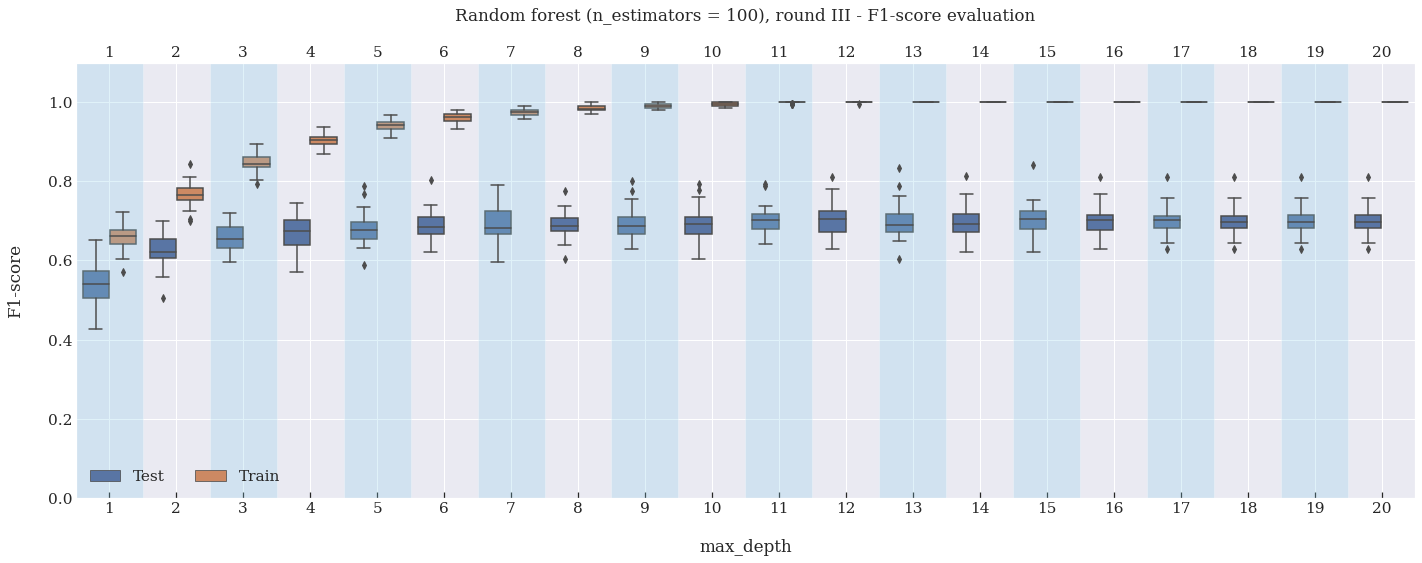

In [98]:
plotScoresGraph("Random forest (n_estimators = 100), round III",random_forest_scores, "max_depth", "F1-score")

After analyzing the performance with the different hyperparameters, it was chosen n_estimators = 100 and max_depth = 11.

In [99]:
random_forest_clf = RandomForestClassifier(n_estimators=100, max_depth=11)

### 6.1.3 Logistic regression round III

In [100]:
logistic_regression_scores = getScores(third_approach_machine_learning, 
                                       "LogisticRegression","solver",['newton-cg', 'lbfgs', 'liblinear', 'sag'], max_iter=1000)

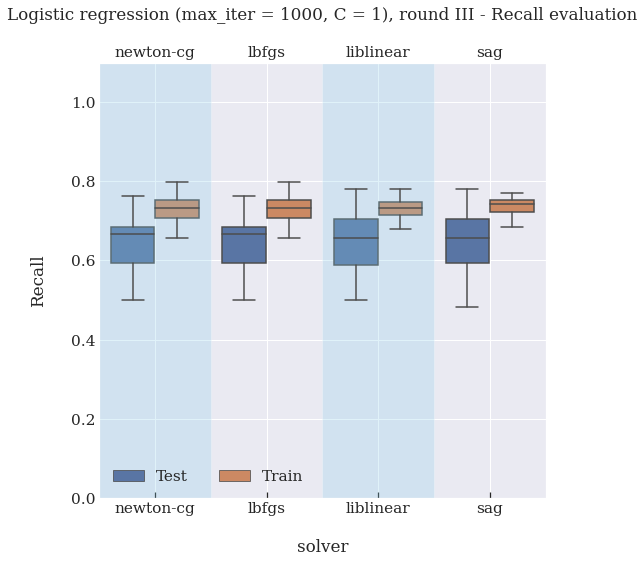

In [101]:
plotScoresGraph("Logistic regression (max_iter = 1000, C = 1), round III", logistic_regression_scores, "solver", "Recall")

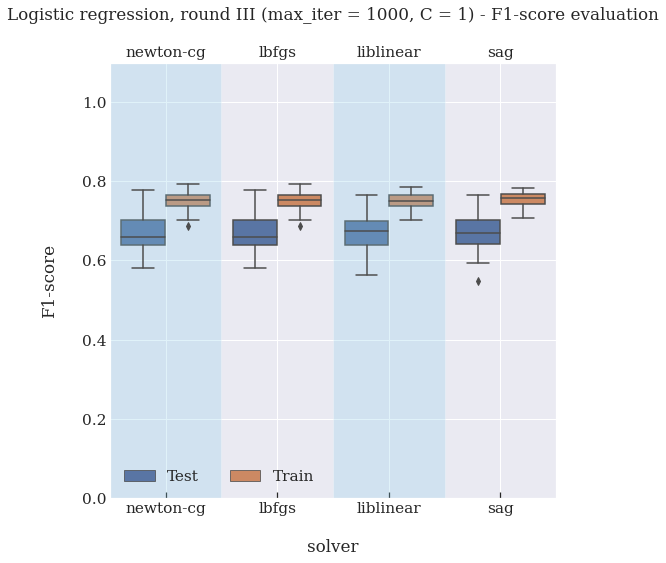

In [102]:
plotScoresGraph("Logistic regression, round III (max_iter = 1000, C = 1)", logistic_regression_scores, "solver", "F1-score")

Let's choose solver = 'lbfgs' again.

In [103]:
logistic_regression_scores = getScores(third_approach_machine_learning, "LogisticRegression","C",
                                       [0.01, 0.1, 1.0, 10, 100, 1000, 10000], max_iter=10000, solver= "'lbfgs'")

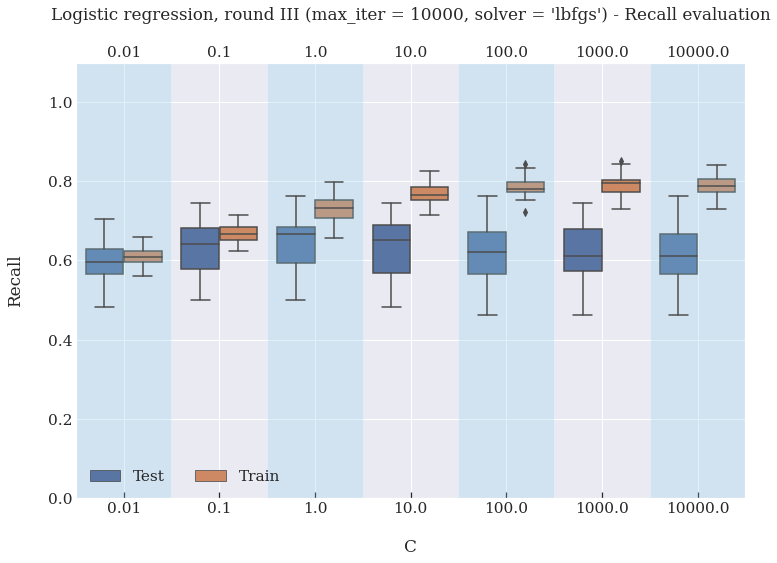

In [104]:
plotScoresGraph("Logistic regression, round III (max_iter = 10000, solver = 'lbfgs')", logistic_regression_scores, "C", "Recall")

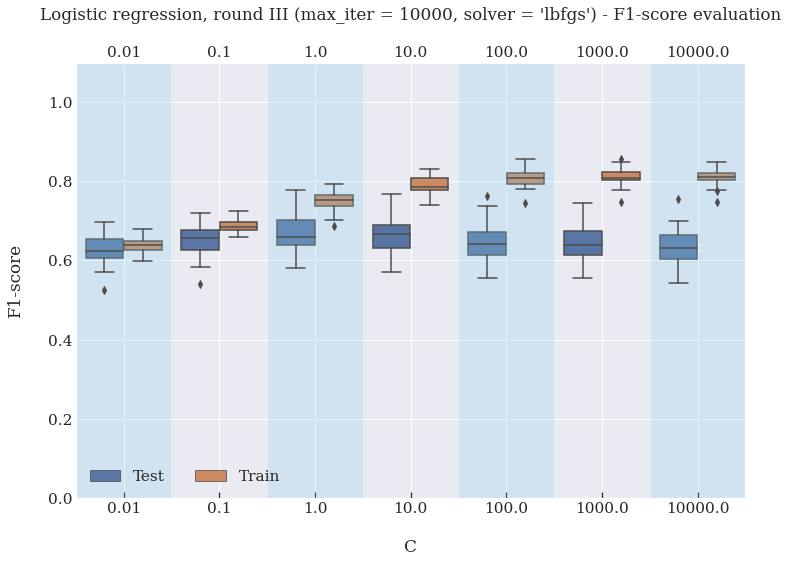

In [105]:
plotScoresGraph("Logistic regression, round III (max_iter = 10000, solver = 'lbfgs')", logistic_regression_scores, "C", "F1-score")

When varying the parameter C, it was necessary to increase the max_iter to 10000 in order to converge.
For now, we will continue to evaluate this parameter, this time between 0.1 and 10.

In [106]:
logistic_regression_scores = getScores(third_approach_machine_learning, "LogisticRegression","C",[0.1, 0.5, 1.0, 2, 3, 5, 10], max_iter=10000, solver= "'lbfgs'")

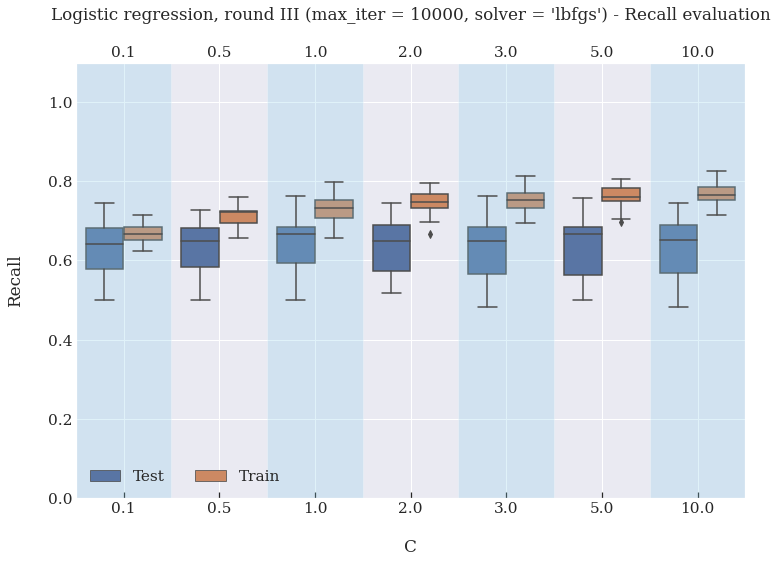

In [107]:
plotScoresGraph("Logistic regression, round III (max_iter = 10000, solver = 'lbfgs')", logistic_regression_scores, "C", "Recall")

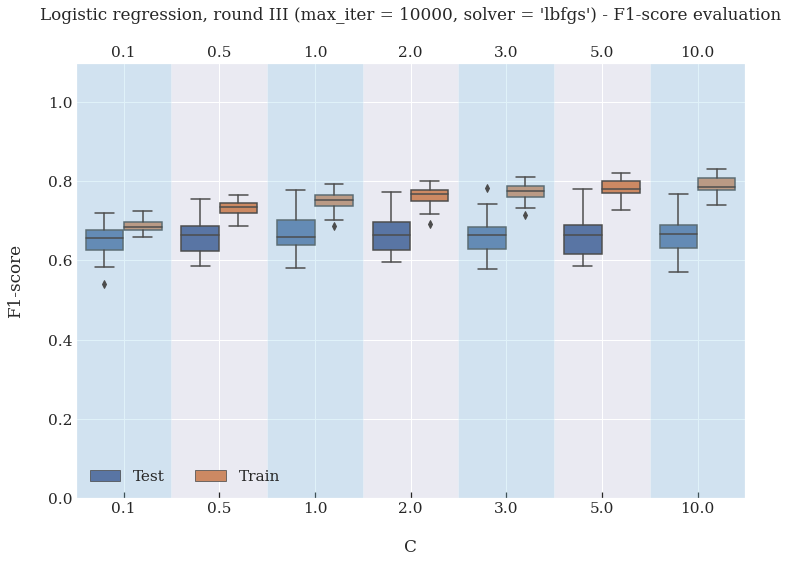

In [108]:
plotScoresGraph("Logistic regression, round III (max_iter = 10000, solver = 'lbfgs')", logistic_regression_scores, "C", "F1-score")

After analyzing the performance with the different hyperparameters, it was chosen solver='lbfgs' and C=1; also, it was necessary to set max_iter = 10000 to converge.

In [109]:
log_reg_clf = LogisticRegression(max_iter=10000, solver='lbfgs', C=1)

### 6.1.4 Performance of models round III

We can see that there was an interesting increase in the performance of the 3 predictors after the change in the database (reduction in the number of columns).

In [110]:
summary_roundIII, scores_models_roundIII = getSummaryScores(third_approach_machine_learning)

# to store the results
scores_models_roundIII["round #"] = "round III"
scores_models_full = pd.concat([scores_models_full, scores_models_roundIII])
scores_models_full

summary_roundIII

Recall        F1-score       
                           mean    std     mean    std
                                                      
Random forest             0.694  0.048    0.703  0.034
Logistic regression       0.643  0.067    0.671  0.045
Decision tree classifier  0.605  0.094    0.622  0.063

## 6.2 Features selection part II: using SelectKBest and defining age-related features 

We are going to reduce the database a little more, by selecting the 10 most features in our data that contribute most to the target variable (ANY_WINDOW_IN_ICU), according to the SelectKBest method, based on the chi-squared function.

For more information about the SelectKBest method, visit this [link](https://www.kaggle.com/jepsds/feature-selection-using-selectkbest?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com) and watch this [video](https://www.youtube.com/watch?v=UW9U0bYJ-Ys).

In [111]:
# we will start this selection by using the previous database, which has 
# already undergone a significant reduction in columns.
fourth_approach_machine_learning = third_approach_machine_learning.copy()

In [112]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# negative values are not allowed, that's why we add 1 for the values of x
x = fourth_approach_machine_learning.drop(columns=["ANY_WINDOW_IN_ICU"])+1
y = fourth_approach_machine_learning["ANY_WINDOW_IN_ICU"]

# k = 10 means we will obtain the 

selector = SelectKBest(chi2, k=10)
selector.fit(x, y)
cols = selector.get_support(indices=True)
fourth_approach_machine_learning = pd.concat([fourth_approach_machine_learning.iloc[:,cols],fourth_approach_machine_learning["ANY_WINDOW_IN_ICU"]],axis=1)

list(fourth_approach_machine_learning.columns[0:-1])

['AGE_ABOVE65',
 'AGE_PERCENTIL',
 'HTN',
 'BE_VENOUS_MEDIAN',
 'BLAST_MEDIAN',
 'LACTATE_MEDIAN',
 'PCR_MEDIAN',
 'BLOODPRESSURE_DIASTOLIC_MEAN',
 'RESPIRATORY_RATE_MEAN',
 'BLOODPRESSURE_SISTOLIC_DIFF']

The columns above are those that were identified as the most relevant for the value of the target variable.

We notice that there are 2 columns referring to age: AGE_ABOVE65 and AGE_PERCENTIL; we will use only one of them; as AGE_PERCENTIL brings more information, we will choose this one. However, the numerical sequence of this categorical variable may end up being oversized by the algorithm; to remove this, we will "explode" this column in multiples, where each one will contain "0" or "1" for that age percentil presented in this feature.

For this, we will use the get_dummies() method.

In [113]:
# it is necessary to reset the index to be possible to concatenate 
# with the variables resulted from the explosion of AGE_PERCENTIL
fourth_approach_machine_learning = fourth_approach_machine_learning.reset_index()

# this variable contains only the columns resulting from AGE_PERCENTIL
exploded_data = pd.get_dummies(fourth_approach_machine_learning.AGE_PERCENTIL)

# we have to concatenate and remove the original column;
# also, let's drop the AGE_ABOVE65 column
fourth_approach_machine_learning = pd.concat([fourth_approach_machine_learning,exploded_data],axis=1).drop(["AGE_PERCENTIL"],axis=1)
fourth_approach_machine_learning = fourth_approach_machine_learning.drop(["AGE_ABOVE65"],axis=1)

# now, let's set the index again
fourth_approach_machine_learning = fourth_approach_machine_learning.set_index("PATIENT_VISIT_IDENTIFIER")
fourth_approach_machine_learning

,HTN,BE_VENOUS_MEDIAN,BLAST_MEDIAN,LACTATE_MEDIAN,PCR_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,RESPIRATORY_RATE_MEAN,BLOODPRESSURE_SISTOLIC_DIFF,ANY_WINDOW_IN_ICU,0,1,2,3,4,5,6,7,8,9
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,
0,0.0,-1.000000,-1.0,1.000000,-0.875236,0.086420,-0.593220,-1.000000,1,0,0,0,0,0,1,0,0,0,0
2,0.0,-1.000000,-1.0,1.000000,-0.939887,-0.489712,-0.645951,-0.533742,1,1,0,0,0,0,0,0,0,0,0
3,0.0,-1.000000,-1.0,-0.828421,-0.503592,0.012346,-0.457627,-1.000000,0,0,0,0,1,0,0,0,0,0,0
4,0.0,-1.000000,-1.0,1.000000,-0.990926,0.333333,-0.593220,-0.877301,0,1,0,0,0,0,0,0,0,0,0
5,0.0,-1.000000,-1.0,1.000000,-0.997732,-0.037037,-0.525424,-0.754601,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0.0,-1.000000,-1.0,1.000000,-0.565974,-0.160494,-0.457627,-1.000000,1,0,0,0,1,0,0,0,0,0,0
381,0.0,-1.000000,-1.0,1.000000,-0.993195,-0.407407,-0.457627,-1.000000,0,0,0,0,0,0,0,0,0,0,1
382,0.0,-1.000000,-1.0,1.000000,-0.034405,0.012346,-0.457627,-1.000000,1,0,0,0,0,1,0,0,0,0,0


Note the new columns that were based in the AGE_PERCENTIL.

Let's do the same as before: vary the hyperparameters and evaluate which are better for this newly reworked data set.

Again, comments will be made only after the end of testing the hyperparameters of each predictor.

At the end of the round IV series, the new performance of the 3 predictors will be presented.

### 6.2.1 Decision tree round IV

In [114]:
decision_tree_scores = getScores(fourth_approach_machine_learning, "DecisionTreeClassifier","max_depth", range(1,21))

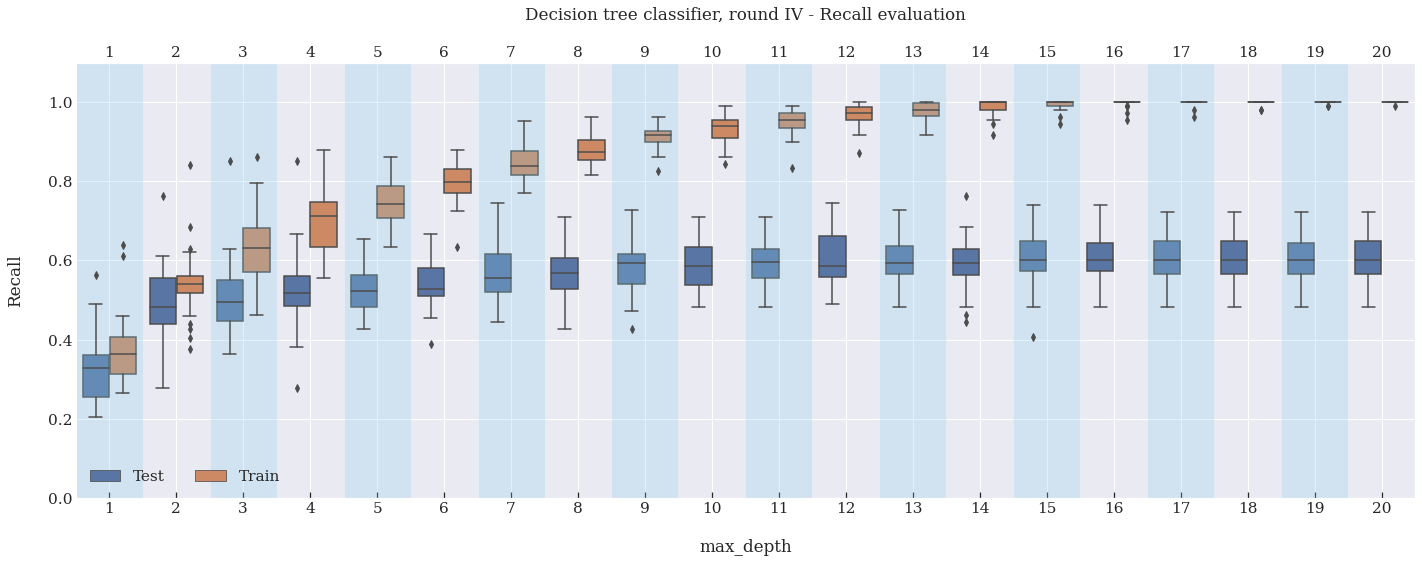

In [115]:
plotScoresGraph("Decision tree classifier, round IV",decision_tree_scores, "max_depth", "Recall")

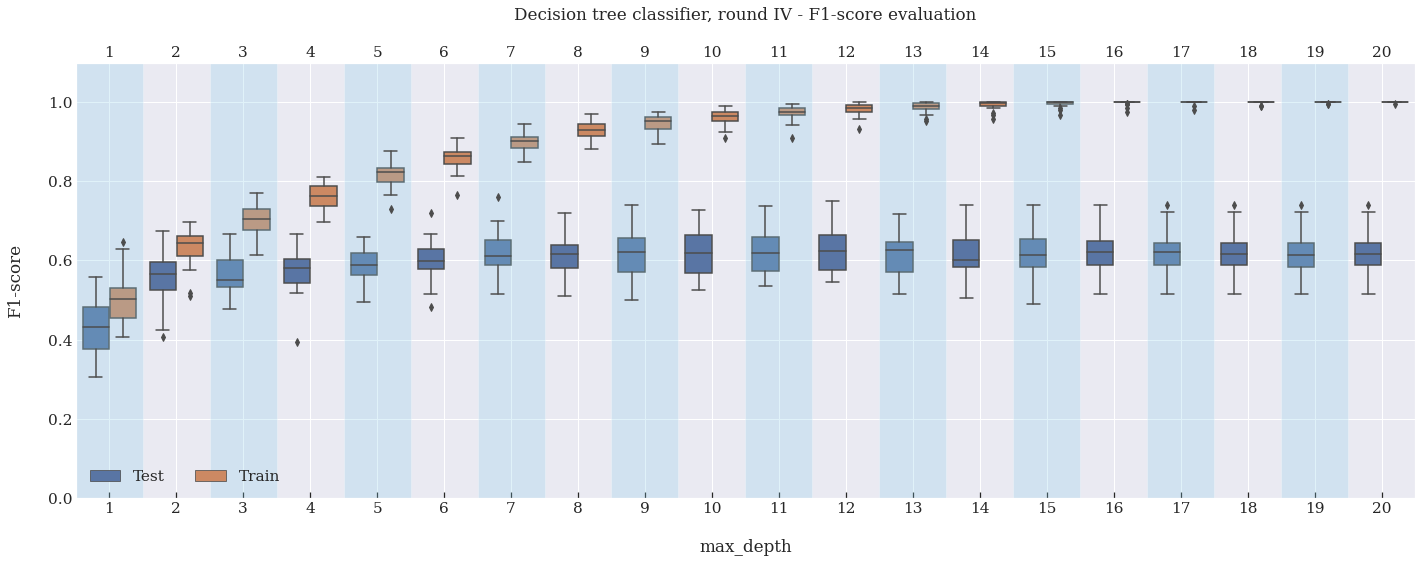

In [116]:
plotScoresGraph("Decision tree classifier, round IV",decision_tree_scores, "max_depth", "F1-score")

Interesting to note that the decision tree classifier is now less prone to overfit. 

After analyzing the performance with the different hyperparameters, it was chosen max_depth=14.

In [117]:
tree_clf = DecisionTreeClassifier(max_depth=14)

### 6.2.2 Random forest round IV

In [118]:
random_forest_scores = getScores(fourth_approach_machine_learning, "RandomForestClassifier","n_estimators",[10,30,50,100,150,200,300,400], max_depth=14)

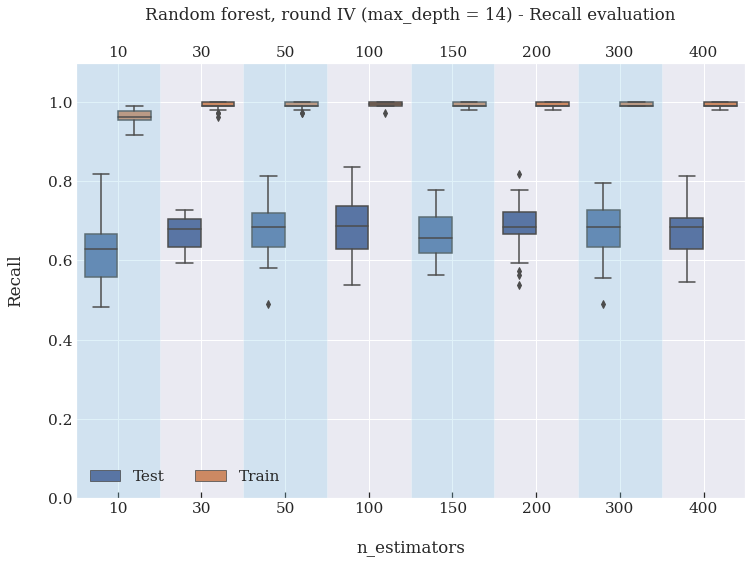

In [119]:
plotScoresGraph("Random forest, round IV (max_depth = 14)",random_forest_scores, "n_estimators", "Recall")

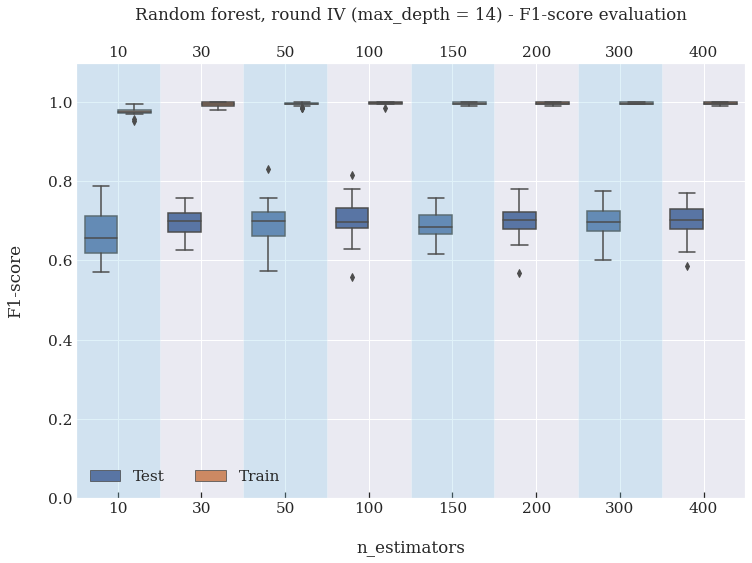

In [120]:
plotScoresGraph("Random forest, round IV (max_depth = 14)",random_forest_scores, "n_estimators", "F1-score")

Note that even in lower n_estimators, the training base is already performing almost perfectly.

Based on the performance of the test data, we will choose n_estimators = 200.

In [121]:
random_forest_scores = getScores(fourth_approach_machine_learning, "RandomForestClassifier","max_depth",range(1, 21), n_estimators=200)

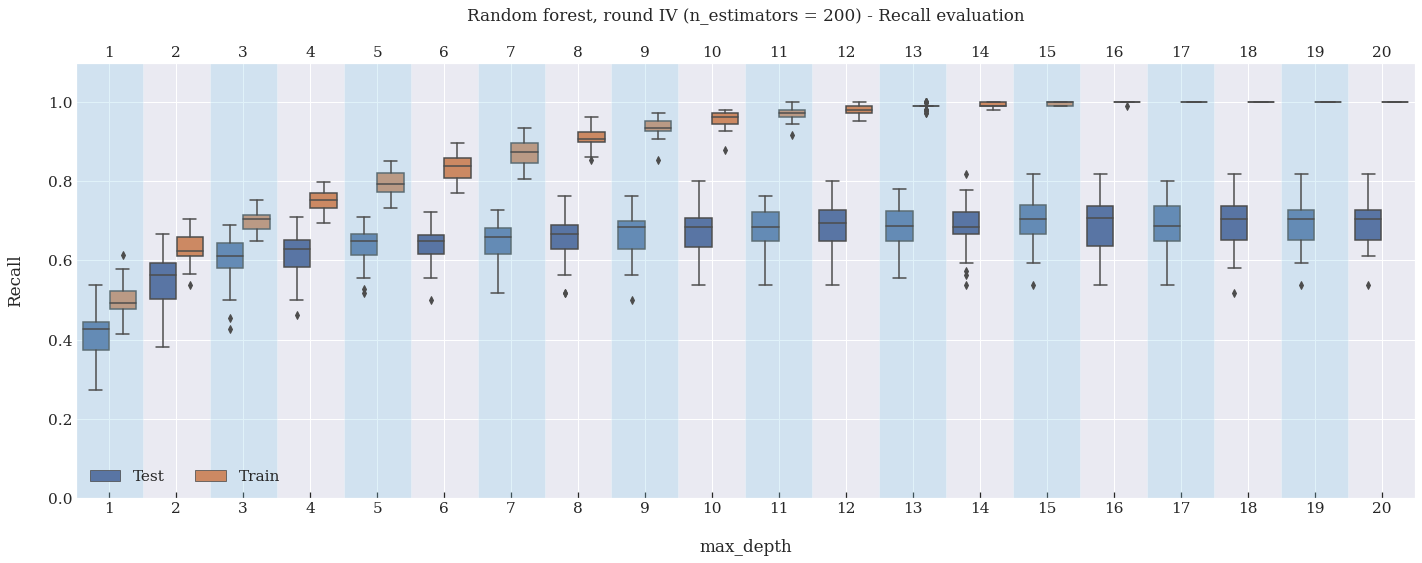

In [122]:
plotScoresGraph("Random forest, round IV (n_estimators = 200)",random_forest_scores, "max_depth", "Recall")

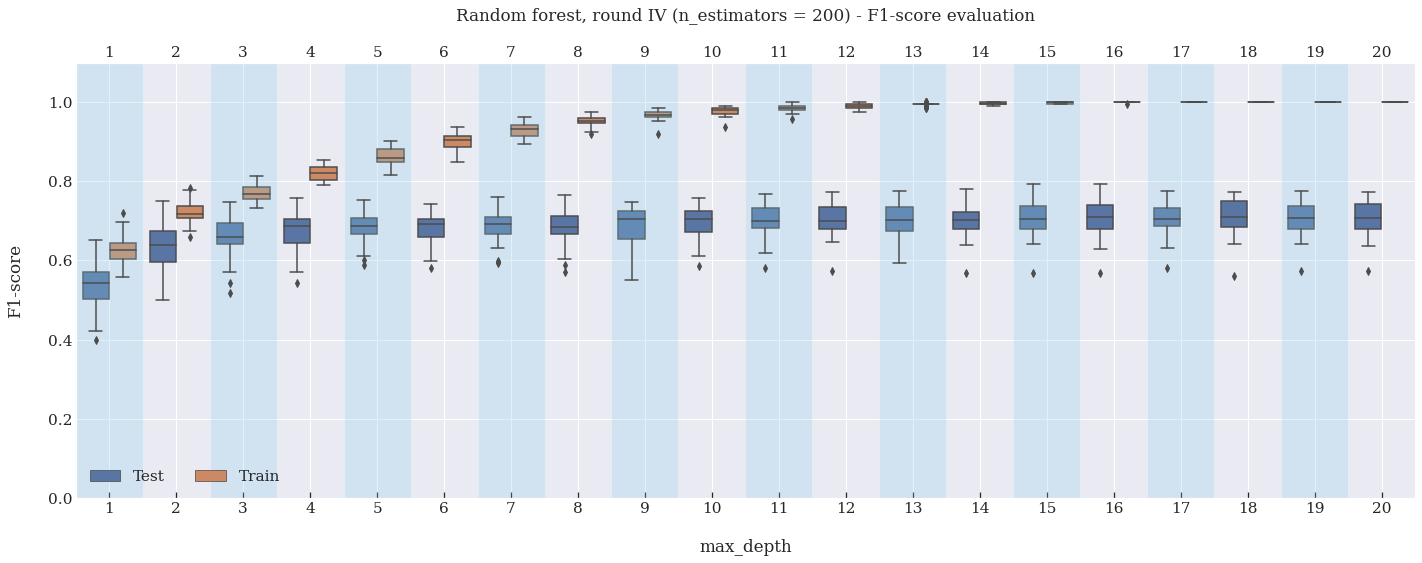

In [123]:
plotScoresGraph("Random forest, round IV (n_estimators = 200)",random_forest_scores, "max_depth", "F1-score")

After analyzing the performance with the different hyperparameters, it was chosen n_estimators = 200 and max_depth = 10.

In [124]:
random_forest_clf = RandomForestClassifier(n_estimators=200, max_depth=10)

### 6.2.3 Logistic regression round IV

In [125]:
logistic_regression_scores = getScores(fourth_approach_machine_learning, 
                                       "LogisticRegression","solver",['newton-cg', 'lbfgs', 'liblinear', 'sag'], max_iter=10000)

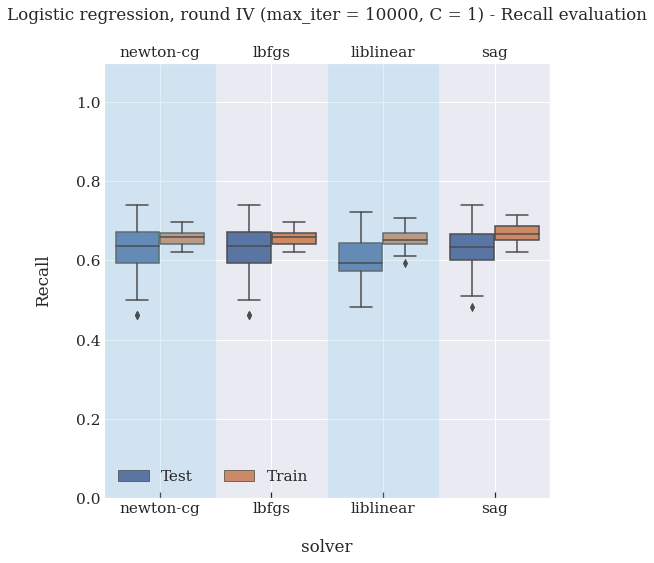

In [126]:
plotScoresGraph("Logistic regression, round IV (max_iter = 10000, C = 1)", logistic_regression_scores, "solver", "Recall")

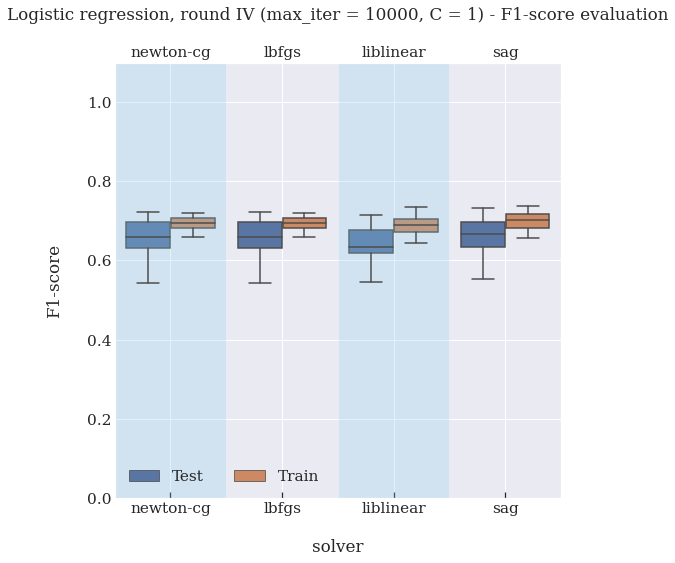

In [127]:
plotScoresGraph("Logistic regression, round IV (max_iter = 10000, C = 1)", logistic_regression_scores, "solver", "F1-score")

Let's choose solver = 'lbfgs' again.

In [128]:
logistic_regression_scores = getScores(fourth_approach_machine_learning, "LogisticRegression",
                                       "C",[0.01, 0.1, 1.0, 10, 100, 1000, 10000], max_iter=10000, solver= "'lbfgs'")

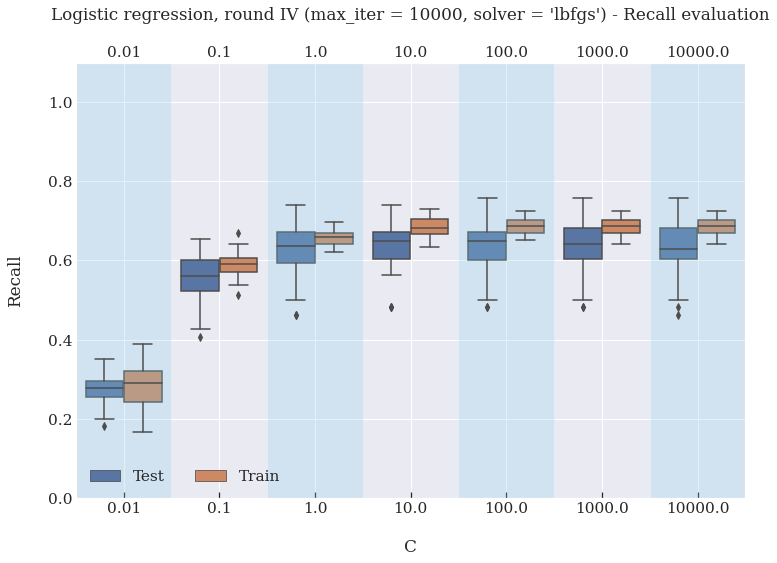

In [129]:
plotScoresGraph("Logistic regression, round IV (max_iter = 10000, solver = 'lbfgs')", logistic_regression_scores, "C", "Recall")

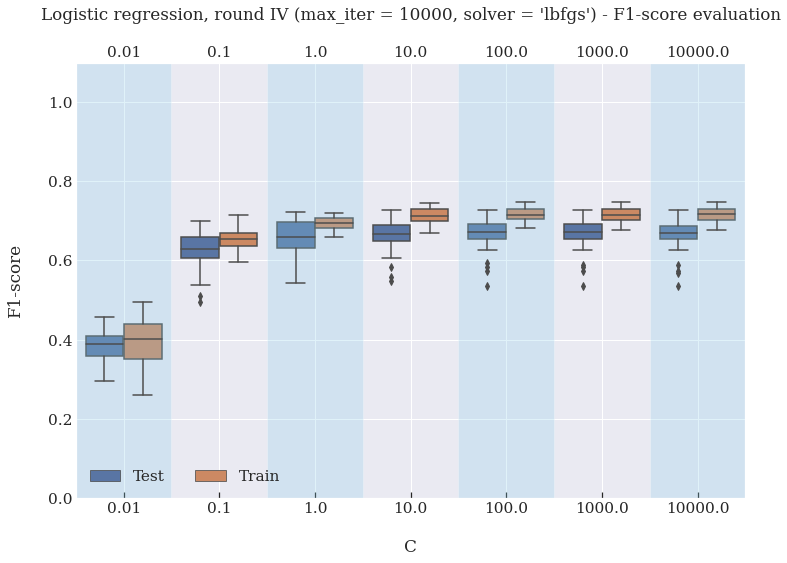

In [130]:
plotScoresGraph("Logistic regression, round IV (max_iter = 10000, solver = 'lbfgs')", logistic_regression_scores, "C", "F1-score")

A poor performance is noted for C = 0.01; we continue to evaluate this parameter between 0.1 and 10.

In [131]:
logistic_regression_scores = getScores(fourth_approach_machine_learning, "LogisticRegression",
                                       "C",[0.1, 0.5, 1.0, 2, 3, 5, 10], max_iter=10000, solver= "'lbfgs'")

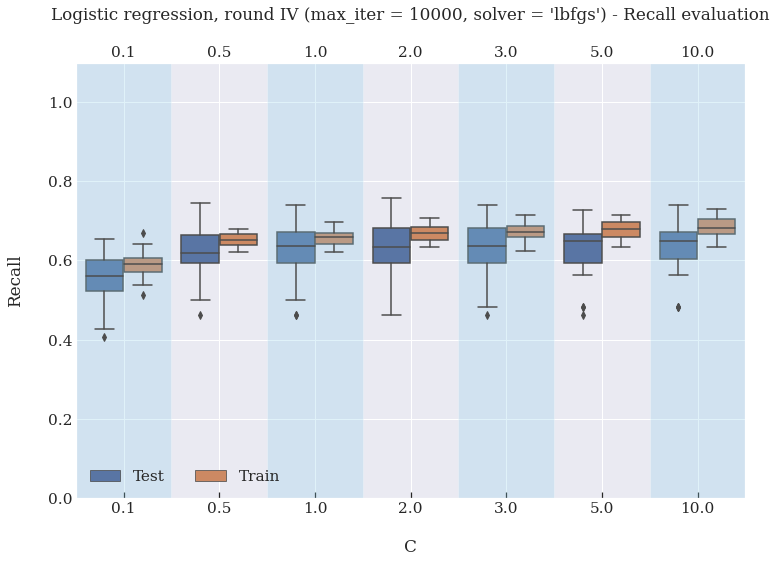

In [132]:
plotScoresGraph("Logistic regression, round IV (max_iter = 10000, solver = 'lbfgs')", logistic_regression_scores, "C", "Recall")

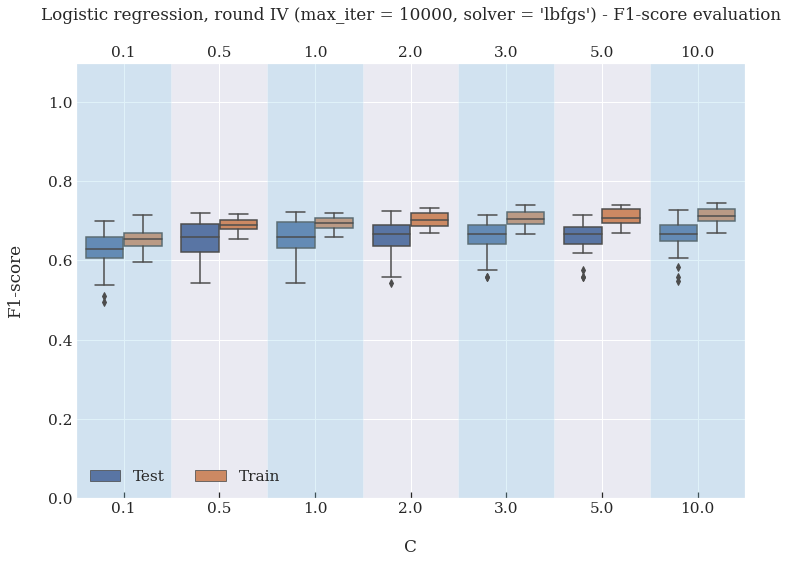

In [133]:
plotScoresGraph("Logistic regression, round IV (max_iter = 10000, solver = 'lbfgs')", logistic_regression_scores, "C", "F1-score")

It is noticed the presence of lower outliers for almost all tested C values. 

After analyzing the performance with the different hyperparameters, it was chosen solver='lbfgs' and C=10; also, it was necessary to set max_iter = 10000 to converge.

In [134]:
log_reg_clf = LogisticRegression(max_iter=10000, solver='lbfgs', C=10)

### 6.2.4 Performance of models round IV

We did not improve (and we ended up getting worse) in relation to the series studied in round III, when we did the first feature removals.

That's life, that's data science. We don't always get the best result after yet another round of committed effort. The important thing is to continue to strive and focus on the best analysis within the time available.

In [135]:
summary_roundIV, scores_models_roundIV = getSummaryScores(fourth_approach_machine_learning)

# to store the results
scores_models_roundIV["round #"] = "round IV"
scores_models_full = pd.concat([scores_models_full, scores_models_roundIV])

summary_roundIV

Recall        F1-score       
                           mean    std     mean    std
                                                      
Random forest             0.674  0.059    0.697  0.042
Logistic regression       0.635  0.070    0.663  0.043
Decision tree classifier  0.593  0.067    0.612  0.054

## 6.3 Identification of data leakage from ICU windows

Now let's take a few steps back. It is often necessary, in data science, to look again at the original database and the first manipulations performed; eventually at that moment we already imbued some persistent error in the rest of the analysis.

When filling in the null data, back at the EDA round I, using the patient's own neighboring windows data, it was not attempted if the patient, when already in the ICU, did not end up providing data for the 0-2 window before going to the ICU, which is the one we use.

The following series of codes performs the filling forwards (ffill) and backwards (bfill) only of the windows outside the ICU ( = 0)

In [136]:
patient_list = data["PATIENT_VISIT_IDENTIFIER"]
df_uci = data.query("ICU == 1")

# first, the UCI = 1 rows are removed
# then, it is performed ffill at the groupby, getting in return a dataframe without patient identifier
# that's the reason it is necessary to concatenate
df_without_uci_ffill = data.drop(data[data["ICU"] == 1].index).groupby("PATIENT_VISIT_IDENTIFIER", as_index=False).fillna(method="ffill")

# agora preciso concatenar as linhas com UTI e a colunas usuários para voltar ao df original
data_ffill = pd.concat([df_uci, df_without_uci_ffill], join="inner").sort_index()

# now, it is necessary to concatenate again with the rows 
# that contain the patient visit identifier 
data_final_ffill = pd.concat([patient_list, data_ffill], axis=1)

# repeat the process to the bfill
# the problem to perform ffill and bfill in the same row, after the groupby,
# is because the return of the first won't consider the groupby anymore 
df_without_uci_bfill = data_final_ffill.drop(data_final_ffill[data_final_ffill["ICU"] == 1]\
                                             .index).groupby("PATIENT_VISIT_IDENTIFIER", as_index=False)\
                                             .fillna(method="bfill")
                                             
data_bfill = pd.concat([df_uci, df_without_uci_bfill], join="inner").sort_index()
data_final = pd.concat([patient_list, data_bfill], axis=1)


See the patient data below; even with the ffill and bfill already applied, we noticed that there are still features with NaN values for WINDOW 0-2 (scroll to the right and note the TEMPERATURE_DIFF_REL and	OXYGEN_SATURATION_DIFF_REL features, for example)

Also note that these null values refer to the 2 first windows, when the patient had not yet been transferred to the ICU, as it happened for windows 4-6 onwards.

It means that we used some ICU values in previous experiments. This is not a good thing and is called [data leakage](https://www.kaggle.com/dansbecker/data-leakage).

In [137]:
data_final[data_final["PATIENT_VISIT_IDENTIFIER"]==18]

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
90,18,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2,0
91,18,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-4,0
92,18,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.959596,-0.977316,-0.876606,-0.766327,-0.736774,-1.000000,-0.960463,4-6,1
93,18,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,1
94,18,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.380952,-0.939394,-0.545780,-0.530096,-0.627689,0.096774,-0.379238,-0.939126,ABOVE_12,1


Let's list all patients who are in the same situation as above:

In [138]:
# patient list that contains null values for WINDOW 0-2 after ffill and bfill 
patient_with_null_values = data_final[data_final.isna().any(axis=1)].query("ICU == 0 and WINDOW=='0-2'").groupby("PATIENT_VISIT_IDENTIFIER").count().index
print(patient_with_null_values)

# the "-1" is for that patient who was dropped from the study
# because it had categorical data with null values, as explained 
# at the end of EDA part I

print(f"\nThere are {len(patient_with_null_values) - 1} patients with NaN values for WINDOW 0-2 after ffill and bfill.")

Int64Index([ 18,  24,  28,  31,  40,  44,  52,  53,  55,  64,  69,  73,  77,
             79,  82,  84,  87, 100, 102, 103, 105, 116, 119, 120, 139, 141,
            142, 145, 148, 149, 155, 161, 191, 199, 215, 227, 234, 235, 252,
            255, 260, 263, 265, 267, 287, 288, 289, 291, 297, 316, 320, 325,
            339, 342, 347, 357, 364, 367, 372],
           dtype='int64', name='PATIENT_VISIT_IDENTIFIER')

There are 58 patients with NaN values for WINDOW 0-2 after ffill and bfill.


There are possible strategies for dealing with this discovery; the simplest (and certainly more costly in performance) is to simply get rid of these patients for the next round of predictor training and testing.

We have to keep in mind that this number (58) is very high considering the total of 352 patients used at the end of EDA part I. It is more than 16% of the entire database, and worse, referring to only those patients who were transferred to ICU at some time window.

This means creating a severe class imbalance in the database, but let's try.

As the best performance obtained so far has been to models trained with the database used in round III, we will rely on it to drop these patients with NaN values in WINDOW = 0-2.

In [139]:
fifth_approach_machine_learning = third_approach_machine_learning.copy().reset_index()
fifth_approach_machine_learning = fifth_approach_machine_learning.query("PATIENT_VISIT_IDENTIFIER not in @patient_with_null_values")
fifth_approach_machine_learning = fifth_approach_machine_learning.set_index("PATIENT_VISIT_IDENTIFIER")
print(f"Number of patients after removal: {fifth_approach_machine_learning.shape[0]}")

Number of patients after removal: 294


With the remaining 294 patients, let's do the same as before: vary the hyperparameters and evaluate which are better for this data set.

Again, comments will be made only after the end of testing the hyperparameters of each predictor.

At the end of the round V series, the new performance of the 3 predictors will be presented.

### 6.3.1 Decision tree round V

In [140]:
decision_tree_scores = getScores(fifth_approach_machine_learning, "DecisionTreeClassifier","max_depth", range(1,16))

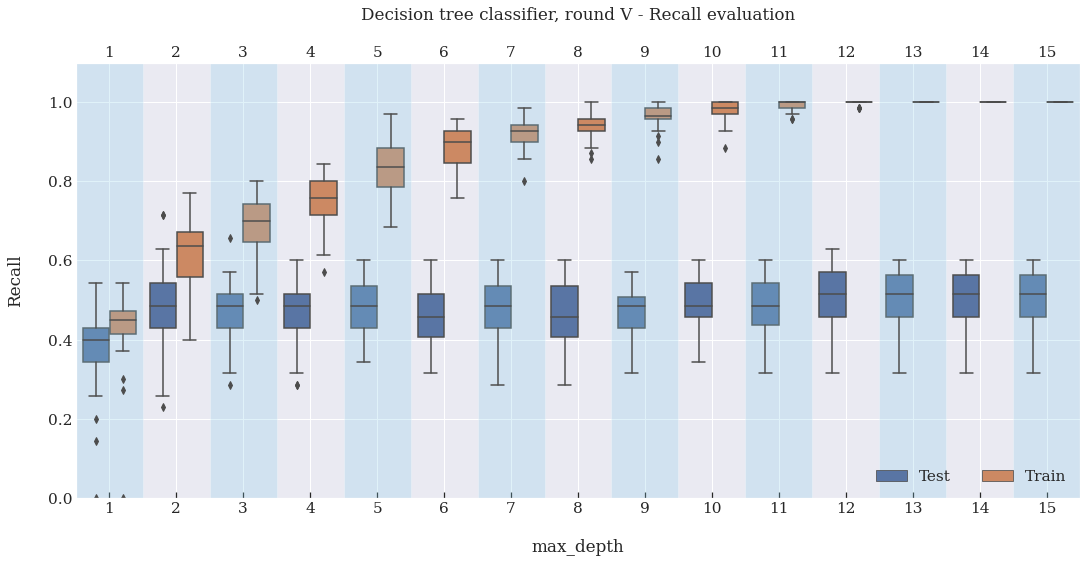

In [141]:
plotScoresGraph("Decision tree classifier, round V",decision_tree_scores, "max_depth", "Recall",legend_bottom_right=True)

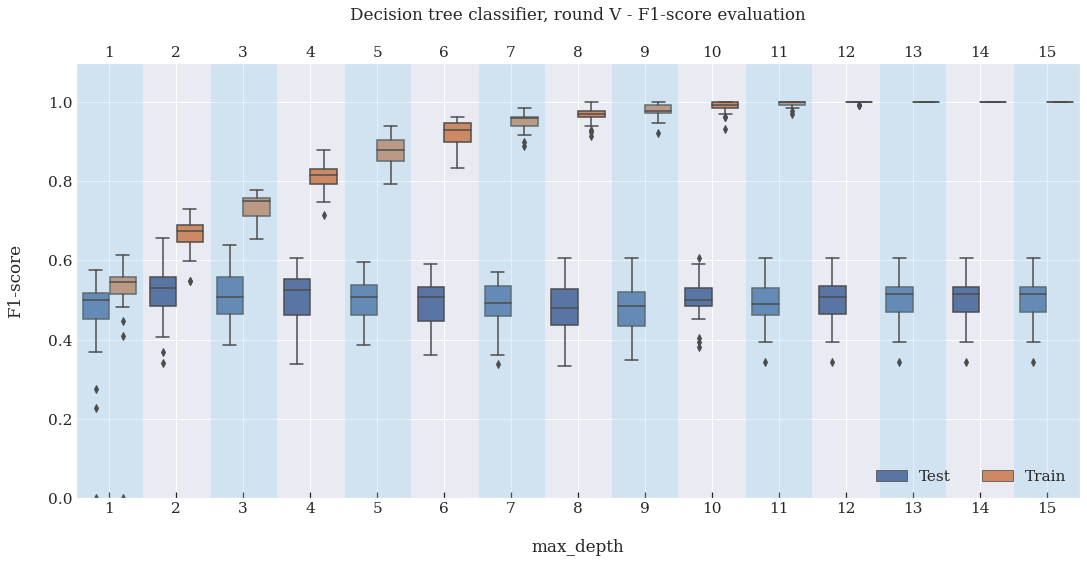

In [142]:
plotScoresGraph("Decision tree classifier, round V",decision_tree_scores, "max_depth", "F1-score",legend_bottom_right=True)

We can see that performance has dropped considerably.
It was chosen max_depth = 5.

In [143]:
tree_clf = DecisionTreeClassifier(max_depth=5)

### 6.3.2 Random forest round V

In [144]:
random_forest_scores = getScores(fifth_approach_machine_learning, "RandomForestClassifier","n_estimators",[10,30,50,100,150,200,300,400], max_depth=5)

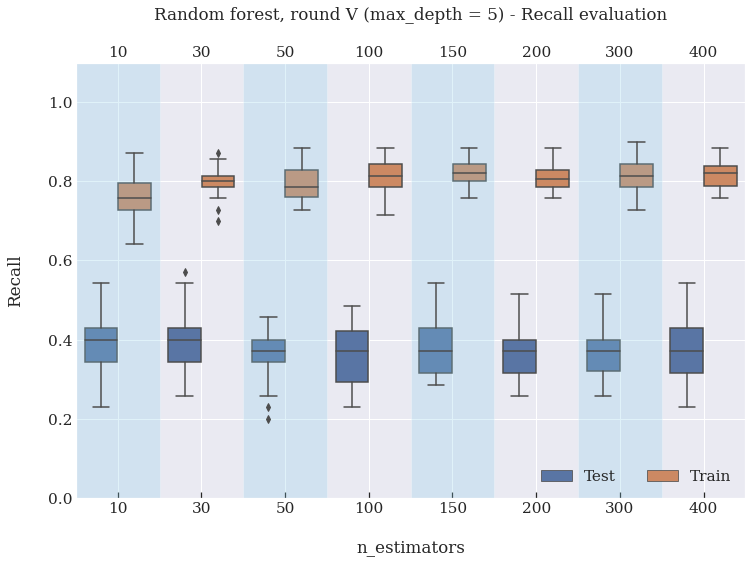

In [145]:
plotScoresGraph("Random forest, round V (max_depth = 5)",random_forest_scores, "n_estimators", "Recall",legend_bottom_right=True)

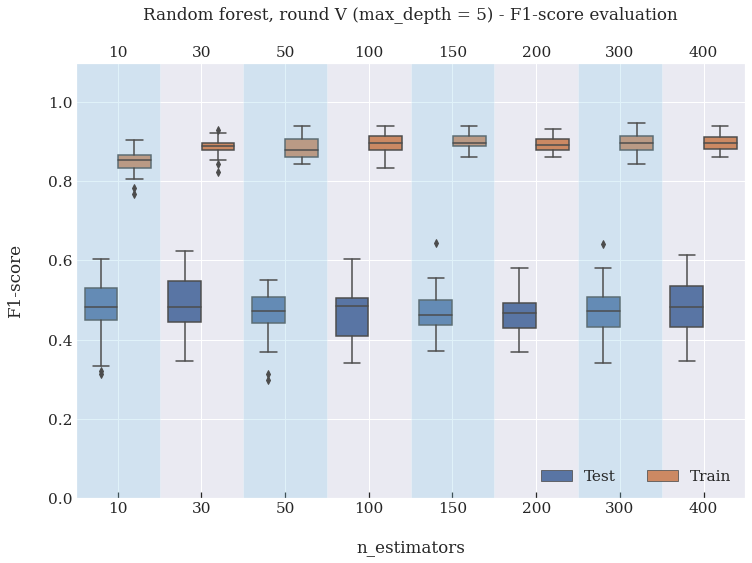

In [146]:
plotScoresGraph("Random forest, round V (max_depth = 5)",random_forest_scores, "n_estimators", "F1-score", legend_bottom_right=True)

In [147]:
random_forest_scores = getScores(fifth_approach_machine_learning, "RandomForestClassifier","max_depth",range(1, 21), n_estimators=10)

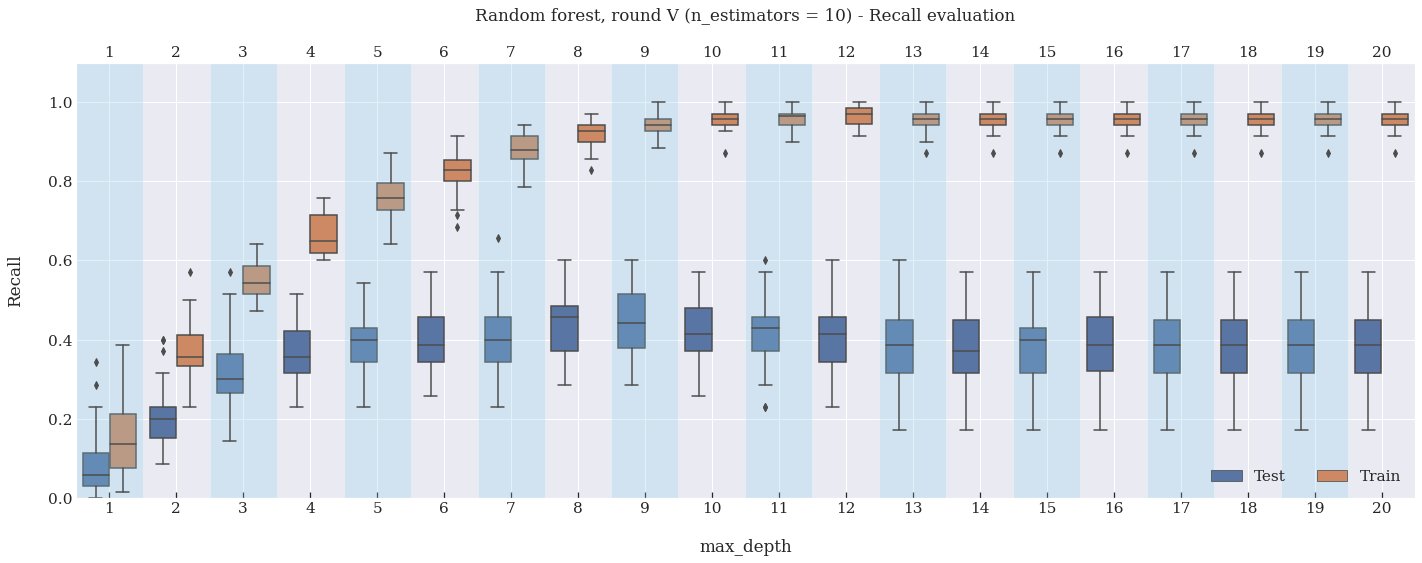

In [148]:
plotScoresGraph("Random forest, round V (n_estimators = 10)",random_forest_scores, "max_depth", "Recall", legend_bottom_right=True)

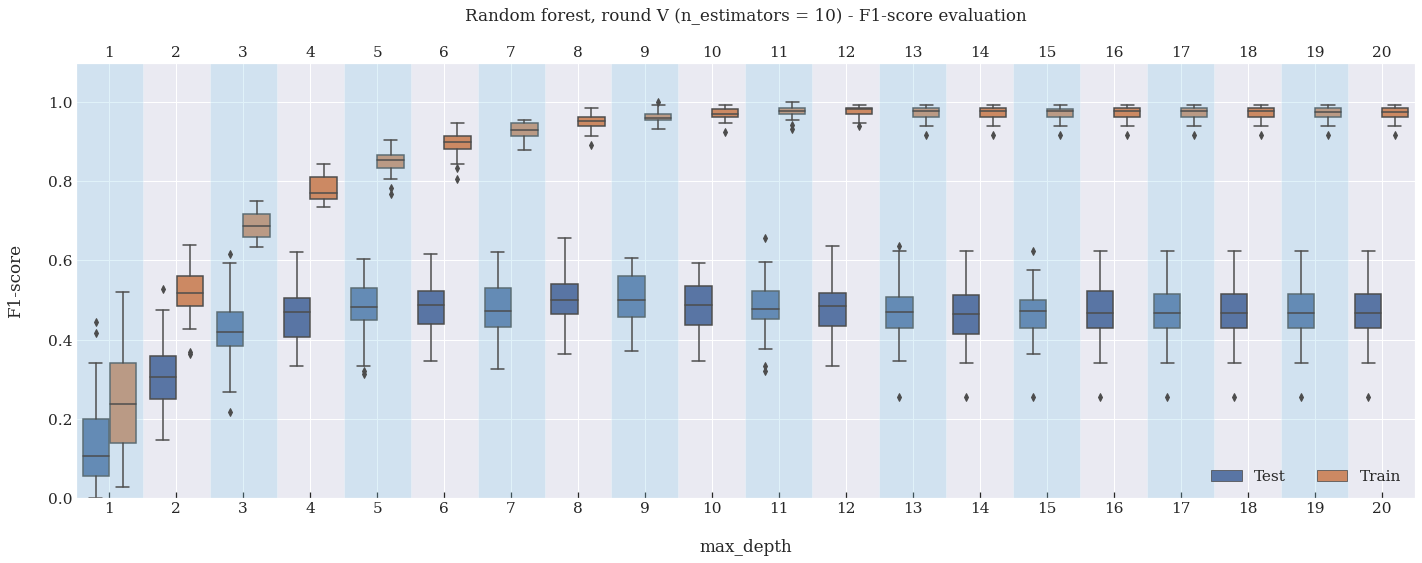

In [149]:
plotScoresGraph("Random forest, round V (n_estimators = 10)",random_forest_scores, "max_depth", "F1-score", legend_bottom_right=True)

The performance is really terrible, compared to the models obtained in the previous rounds.

It was chosen n_estimators = 10 and max_depth = 8.

In [150]:
random_forest_clf = RandomForestClassifier(n_estimators=10, max_depth=8)

### 6.3.3 Logistic regression round V

In [151]:
logistic_regression_scores = getScores(fifth_approach_machine_learning, "LogisticRegression","solver",['newton-cg', 'lbfgs', 'liblinear', 'sag'], max_iter=10000)


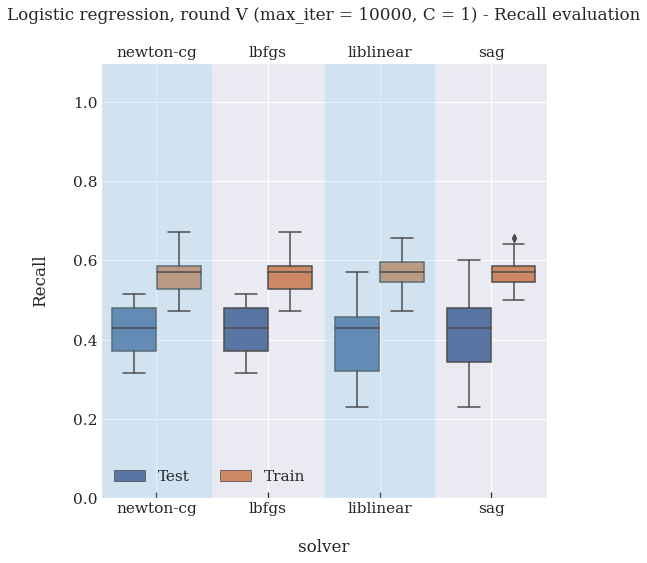

In [152]:
plotScoresGraph("Logistic regression, round V (max_iter = 10000, C = 1)", logistic_regression_scores, "solver", "Recall")

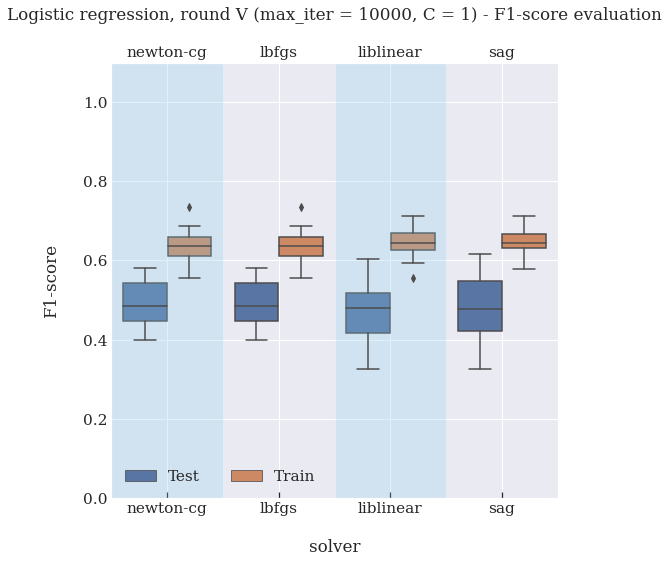

In [153]:
plotScoresGraph("Logistic regression, round V (max_iter = 10000, C = 1)", logistic_regression_scores, "solver", "F1-score")

Let's choose solver = 'lbfgs' again.

In [154]:
logistic_regression_scores = getScores(fifth_approach_machine_learning, 
                                       "LogisticRegression","C",[0.01, 0.1, 1.0, 10, 100, 1000, 10000], max_iter=10000, solver= "'lbfgs'")

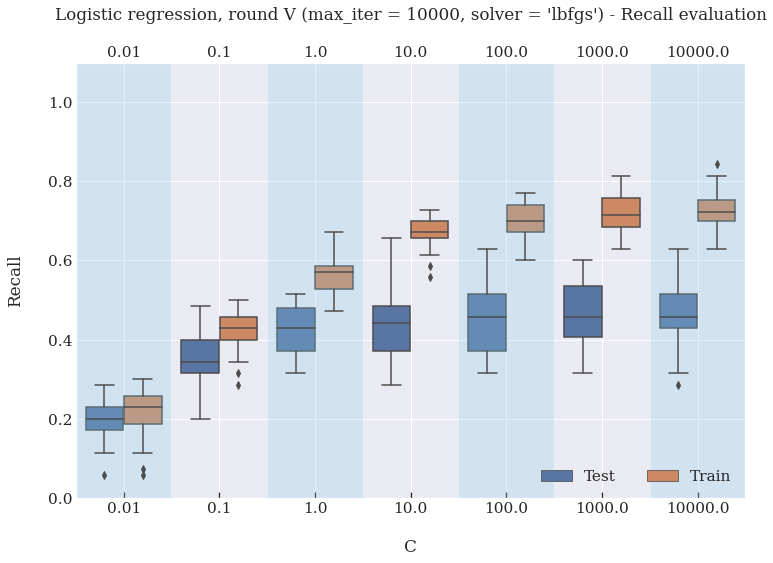

In [155]:
plotScoresGraph("Logistic regression, round V (max_iter = 10000, solver = 'lbfgs')", 
                logistic_regression_scores, "C", "Recall",legend_bottom_right=True)

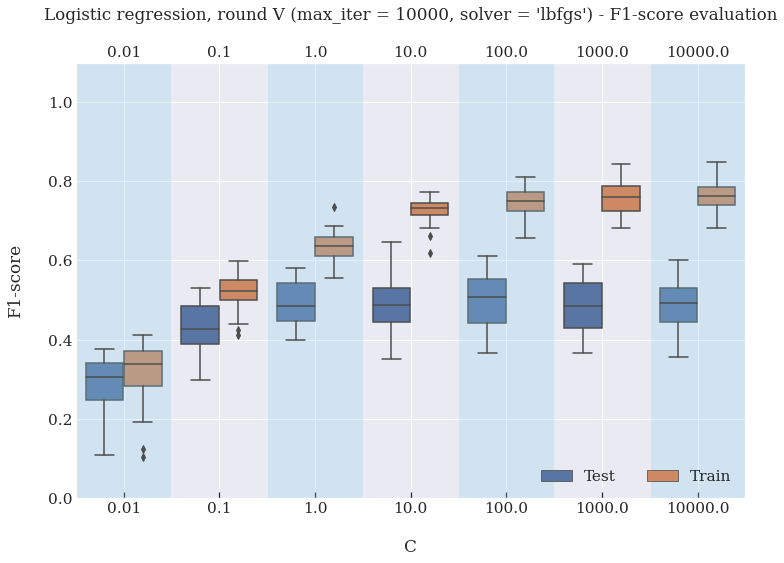

In [156]:
plotScoresGraph("Logistic regression, round V (max_iter = 10000, solver = 'lbfgs')", logistic_regression_scores, "C", "F1-score",legend_bottom_right=True)

After analyzing the performance with the different hyperparameters, it was chosen solver='lbfgs' and C=100; also, it was necessary to set max_iter = 10000 to converge.

In [157]:
log_reg_clf = LogisticRegression(max_iter=10000, solver='lbfgs', C=100)

### 6.3.4 Performance of models round V

In [158]:
summary_roundV, scores_models_roundV = getSummaryScores(fifth_approach_machine_learning)

# to store the results
scores_models_roundV["round #"] = "round V"
scores_models_full = pd.concat([scores_models_full, scores_models_roundV])

summary_roundV

Recall        F1-score       
                           mean    std     mean    std
                                                      
Decision tree classifier  0.478  0.071    0.499  0.051
Logistic regression       0.456  0.088    0.497  0.064
Random forest             0.447  0.084    0.508  0.070

As already mentioned, the performance has melted compared to the results obtained previously.

Compare the "before" and "after" removal of patients for round V training and testing.

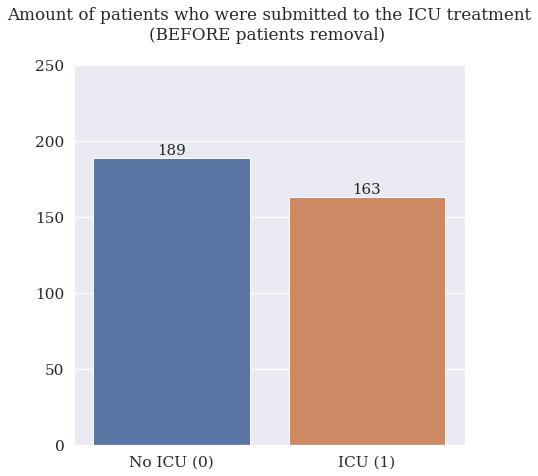

In [159]:
title = "Amount of patients who were submitted to the ICU treatment\n(BEFORE patients removal) "
plotGraph(data = first_approach_machine_learning.groupby("PATIENT_VISIT_IDENTIFIER").agg({"ANY_WINDOW_IN_ICU": max}), type = "bar", title = title, x="ANY_WINDOW_IN_ICU", y_limit=250, labels = True)


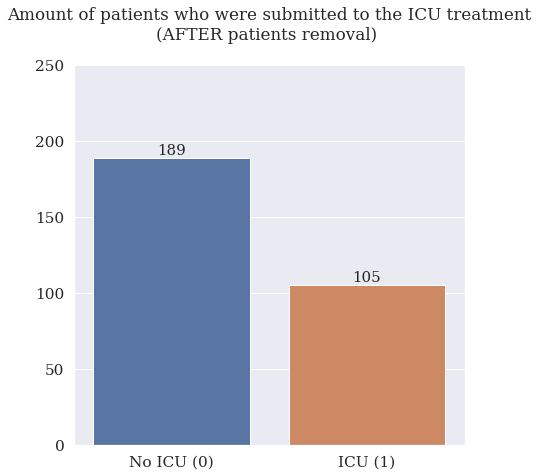

In [160]:
title = "Amount of patients who were submitted to the ICU treatment\n(AFTER patients removal) "
plotGraph(data = fifth_approach_machine_learning.groupby("PATIENT_VISIT_IDENTIFIER").agg({"ANY_WINDOW_IN_ICU": max}), type = "bar", title = title, x="ANY_WINDOW_IN_ICU", y_limit=250, labels = True)

Realize the impact that an imbalance data can have on the model.

Now suppose that the data collected has already been obtained in an unbalanced manner (for example, for every 5 patients who go to the ICU, it was collected data for 2 and for every 5 who do not, it was collected data for 4).

Think about the impact of putting into production the best possible model obtained after training it with these already unbalanced data in the collection.

The criterion of a data scientist must be high throughout the work chain.

![](images/balance.jpg)

# 7. Summary of all performances obtained

The table below shows all the performances found in all training / test rounds for the 3 predictors. 

There is no standard deviation for the round I models as only a single forecast was made.

In [161]:
pd.pivot_table(scores_models_full, values=['Recall', 'F1-score'], index=['Model', 'round #'],
               aggfunc={'Recall': [np.mean, np.std],
                        'F1-score': [np.mean, np.std]}, 
               fill_value=0).round(3).rename_axis(['',''])

F1-score        Recall       
                                       mean    std   mean    std
                                                                
Decision tree classifier round I      0.600  0.000  0.551  0.000
                         round II     0.616  0.056  0.592  0.088
                         round III    0.622  0.063  0.605  0.094
                         round IV     0.612  0.054  0.593  0.067
                         round V      0.499  0.051  0.478  0.071
Logistic regression      round I      0.697  0.000  0.633  0.000
                         round II     0.667  0.049  0.637  0.074
                         round III    0.671  0.045  0.643  0.067
                         round IV     0.663  0.043  0.635  0.070
                         round V      0.497  0.064  0.456  0.088
Random forest            round I      0.702  0.000  0.673  0.000
                         round II     0.684  0.041  0.660  0.056
                         round III    0.703  0.034  0.694  0.048
                         round IV     0.697  0.042  0.674  0.059
                         round V      0.508  0.070  0.447  0.084

We can plot the results as well:

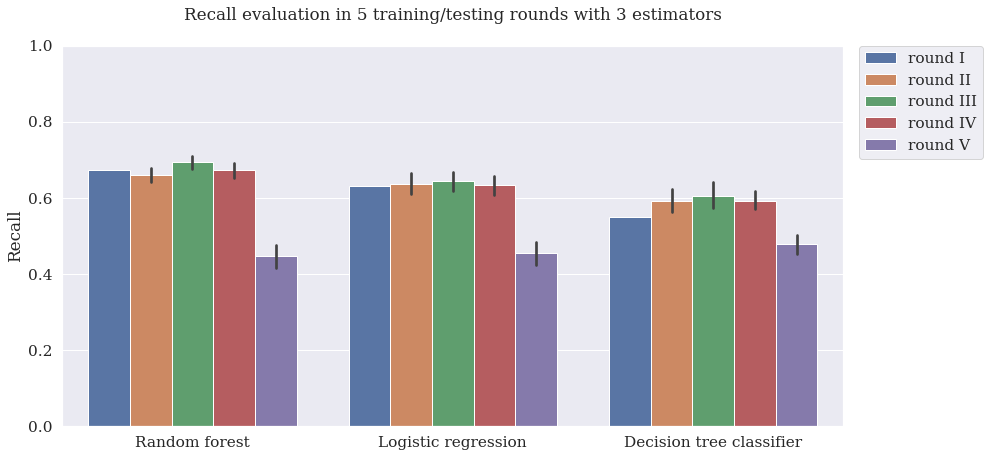

In [162]:
sns.set_theme(style = "darkgrid", font='serif', font_scale = 1.4)
ax = sns.barplot(data=scores_models_full, x="Model", y="Recall", hue="round #")
ax.figure.set_size_inches(14,7)
ax.set_title("Recall evaluation in 5 training/testing rounds with 3 estimators" + "\n")
ax.set(xlabel=None)
ax.set_ylim(0,1)

# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

plt.savefig("outputs/recall_all_rounds", bbox_inches="tight", pad_inches=0.2)

plt.show(ax)

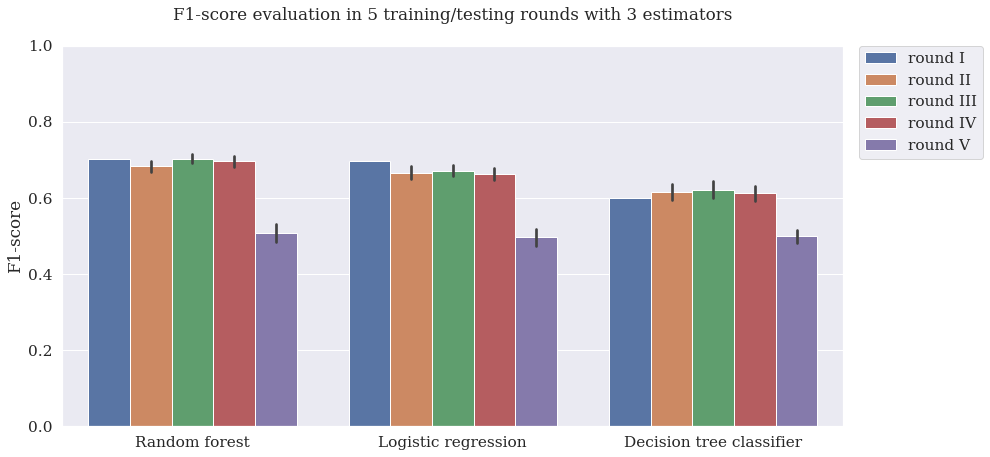

In [163]:
sns.set_theme(style = "darkgrid", font='serif', font_scale = 1.4)
ax = sns.barplot(data=scores_models_full, x="Model", y="F1-score", hue="round #")
ax.figure.set_size_inches(14,7)
ax.set_title("F1-score evaluation in 5 training/testing rounds with 3 estimators" + "\n")
ax.set(xlabel=None)
ax.set_ylim(0,1)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

plt.savefig("outputs/f1_score_all_rounds", bbox_inches="tight", pad_inches=0.2)

plt.show(ax)

Apparently, the best model was the random forest, trained in round III.
We also noticed that the random forest always performed better than the decision tree classifier (except in round V, which was a disaster for all models).

# 8. Conclusions

- As can be seen throughout this work, it is part of the data scientist's life to iterate between exploratory data analysis, treatment of the database, modifications of the hyperparameters of the estimators, model training and testing;

- An extensive exploratory data analysis was carried out, which resulted in the elimination of some data that would compromise the quality of the models;

- A first round of machine learning was carried out for 3 different estimators: decision tree classifier, random forest and logistic regression; it was concluded, however, that the performance of such predictions represented nothing, being a mere product of luck;

- To support a real evaluation of the model, cross-validation was presented and performed for other 4 training and testing rounds.

- In addition to cross-validation, some hyperparameters were also varied and tested for the 3 different estimators mentioned above; the difference in predictive power, in general, varied considerably as the hyperparameter varied;

- The best estimator, for the analyzes carried out in this work, was the random forest, followed by the logistic regression;

- It was noticed a considerable increase in performance for all the estimators by reducing the number of database columns (features) that were duplicated and highly correlated with themselves; however, by exaggerating the dose and removing more features, we negate the benefits previously obtained;

- It was diagnosed that in the initial treated database there was a data leakage that could be impacting the predictive capacity of the models; a new round of tests was carried out, but there was no success in improving the performance obtained previously;

- The failure of this attempt, however, has resulted in reflection and consideration of the impact on classification analysis when data collection and data availability is already carried out in an unbalanced manner from the beggining of the work.

- Next steps and strategies were discussed in an attempt to improve the predictive performance of the estimators.

# 9. Next steps/studies

- Modify the strategy used after we detected the occurrence of data leakage;
  - try to keep most patients where this occurs, carefully selecting features where there is no leakage.
  - try to maintain the original distribution of classes, randomly removing patients who do not go to the ICU;

- Study and vary other hyperparameters in the three studied estimators;

- Better rework the feature selection using different methods from those presented in this work;

- Evaluate other rating estimators, such as [Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html), [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html#classification) and [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html);

- Finally, due to the notable increase in complexity, study and develop a [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) as a pre-processing step before doing the model learning.

